<table align="center" width="100%">
    <tr>
        <td width="35%">
            <img src="https://scaler-blog-prod-wp-content.s3.ap-south-1.amazonaws.com/wp-content/uploads/2021/04/22114228/Scaler-HT-1-1-860x484.png">
        </td>
        <td>
            <div align="center">
              <font color="#0052cc" size="8"><span><b>Business case</b></span></font>
                <br>
                <br>
                <br>
                <font color="grey" size="4">
                    <b>by Lohith Kumar Kasula</b>
                </font>
            </div>
        </td>
    </tr>
</table>

---
#<font color="0052cc"><span><b>Context :</b></span></font>
Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.


---
#<font color="0052cc"><span><b>Problem Statement:</b></span></font>

Working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. Provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

---
#<font color="0052cc"><span><b>Column Profiling :</b></span></font>




|<font size=4 color=black>Feature|<font size=4 color=black>Description|
|-|-|
|<font size=2>**Unnamed 0**|<font size=2>Index of the dataset|
|<font size=2>**Email_hash**|<font size=2>Anonymised Personal Identifiable Information (PII)|
|<font size=2>**Company_hash**|<font size=2>This represents an anonymized identifier for the company, which is the current employer of the learner.|
|<font size=2>**orgyear**|<font size=2>Employment start date|
|<font size=2>**CTC**|<font size=2>Current CTC|
|<font size=2>**Job_position**|<font size=2>Job profile in the company|
|<font size=2>**CTC_updated_year**|Year in which CTC got updated (Yearly increments, Promotions)|


___
#<font color="#0052cc"><span><b>Modelling Techniques Used :</b></span></font>

* Manual Clustering
* Unsupervised Clustering : K- means, Hierarchical Clustering

___
#<font color="#0052cc"><span><b>Installing and Importing all the required Libraries:</b></span></font>

In [ ]:
!pip install colorama
!pip install category_encoders
!pip install -U scikit-learn
!pip install imblearn
!pip install pydot

In [ ]:
import numpy as np
import pandas as pd
import pickle
import re
import statsmodels.api as sm
from scipy.stats import ttest_ind, ttest_rel, chi2, chi2_contingency, chisquare, \
f_oneway, spearmanr, pearsonr, norm, shapiro, kstest
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from colorama import Fore, Back, Style
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, \
confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, accuracy_score
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
import calendar
import datetime as dt
from scipy.stats import uniform
from sklearn.impute import KNNImputer
import datetime

---
#<font color="#0052cc"><span><b>Mounting Google Drive </b></span></font>

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
drive.mount('/content/drive', force_remount=True)
df_scaler = pd.read_csv('/content/drive/MyDrive/Scaler/BusinessCases/DataSets/ScalerBusinesscase/scaler_clustering.csv')
pd.set_option('display.max_columns', 30)
original_df = df_scaler.copy()
df_scaler.head()

Mounted at /content/drive


Unnamed: 0               company_hash  \
0           0             atrgxnnt xzaxv   
1           1  qtrxvzwt xzegwgbb rxbxnta   
2           2              ojzwnvwnxw vx   
3           3                  ngpgutaxv   
4           4                 qxen sqghu   

                                          email_hash  orgyear      ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...   2015.0  2000000   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58...   2017.0   700000   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...   2017.0  1400000   

         job_position  ctc_updated_year  
0               Other            2020.0  
1  FullStack Engineer            2019.0  
2    Backend Engineer            2020.0  
3    Backend Engineer            2019.0  
4  FullStack Engineer            2019.0

___
#<font color="#0052cc"><span><b>Basic analysis on raw data</b></span></font>

___
##<font color="9e1d73"><span><b>Shape of Data</b></span></font>

In [ ]:
df_scaler.shape

NameError: name 'df_scaler' is not defined

___
##<font color="9e1d73"><span><b>Dataset Info</b></span></font>

In [ ]:
df_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


___
##<font color="9e1d73"><span><b>Null value details in percent</b></span></font>

In [ ]:
def get_isna_details(dataframe):
  df_null_values = np.round((dataframe.isna().sum()/len(dataframe) * 100), 2)
  df_null_values.index.name = 'Features'
  df_null_values.name = 'Percent'
  display(df_null_values)

get_isna_details(df_scaler)

Features
Unnamed: 0           0.00
company_hash         0.02
email_hash           0.00
orgyear              0.04
ctc                  0.00
job_position        25.54
ctc_updated_year     0.00
Name: Percent, dtype: float64

___
##<font color="9e1d73"><span><b>Duplicate samples check</b></span></font>

In [ ]:
df_scaler.duplicated().sum()

0

___
##<font color="9e1d73"><span><b>Data statistics</b></span></font>

In [ ]:
df_scaler.describe()

Features     Unnamed: 0        orgyear           ctc  ctc_updated_year
count     205843.000000  205757.000000  2.058430e+05     205843.000000
mean      103273.941786    2014.882750  2.271685e+06       2019.628231
std        59741.306484      63.571115  1.180091e+07          1.325104
min            0.000000       0.000000  2.000000e+00       2015.000000
25%        51518.500000    2013.000000  5.300000e+05       2019.000000
50%       103151.000000    2016.000000  9.500000e+05       2020.000000
75%       154992.500000    2018.000000  1.700000e+06       2021.000000
max       206922.000000   20165.000000  1.000150e+09       2021.000000

In [ ]:
df_scaler.describe(include=['object', 'category'])

Features               company_hash  \
count                        205799   
unique                        37299   
top       nvnv wgzohrnvzwj otqcxwto   
freq                           8337   

Features                                         email_hash      job_position  
count                                                205843            153279  
unique                                               153443              1016  
top       bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...  Backend Engineer  
freq                                                     10             43554

___
##<font color="9e1d73"><span><b>Printing the unique values in the data</b></span></font>

In [ ]:
def print_unique_values(dataframe, features):
  for _ in features:
    print(f'{Fore.GREEN}+-'*50)
    print(f'{Fore.RED}{_}:')
    if dataframe[_].dtype == 'category':
      print(f'{Fore.MAGENTA}Length : {Fore.BLUE} {len(dataframe[_].cat.categories.values)}')
      print(f'{Fore.MAGENTA}Values : {Fore.BLUE} {dataframe[_].cat.categories.values}')
    else:
      print(f'{Fore.MAGENTA}Length : {Fore.BLUE} {dataframe[_].nunique()}')
      print(f'{Fore.MAGENTA}Values : {Fore.BLUE} {dataframe[_].unique()}')

In [ ]:
print_unique_values(df_scaler, df_scaler.columns)

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Unnamed: 0:
Length :  205843
Values :  [     0      1      2 ... 206920 206921 206922]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
company_hash:
Length :  37299
Values :  ['atrgxnnt xzaxv' 'qtrxvzwt xzegwgbb rxbxnta' 'ojzwnvwnxw vx' ...
 'ztdnowb xzwqtee' 'mrht onvnt axsxnvr' 'bvptbjnqxu td vbvkgz']
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
email_hash:
Length :  153443
Values :  ['6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af'
 'b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b'
 '4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059' ...
 'cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c'
 'fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699'
 '0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a8

___
#<font color="#0052cc"><span><b>Data Cleaning</b></span></font>

___
##<font color=brown><span><b>Dropping Irrelevant Features/columns</b></span></font>

In [ ]:
df_scaler.drop(df_scaler.columns[0], inplace=True, axis=1)
df_scaler.head(2)

Features               company_hash  \
0                    atrgxnnt xzaxv   
1         qtrxvzwt xzegwgbb rxbxnta   

Features                                         email_hash  orgyear      ctc  \
0         6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000   
1         b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999   

Features        job_position  ctc_updated_year  
0                      Other            2020.0  
1         FullStack Engineer            2019.0

___
##<font color=brown><span><b>Handling Special charaters for job_position column</font>

In [ ]:
df_scaler['job_position'] = df_scaler['job_position'].str.lower()
df_scaler['job_position'] = df_scaler['job_position'].str.strip()
df_scaler.head(2)

Features               company_hash  \
0                    atrgxnnt xzaxv   
1         qtrxvzwt xzegwgbb rxbxnta   

Features                                         email_hash  orgyear      ctc  \
0         6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000   
1         b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999   

Features        job_position  ctc_updated_year  
0                      other            2020.0  
1         fullstack engineer            2019.0

In [ ]:
df_job_position_num_values = df_scaler[df_scaler['job_position'].str.isnumeric() & ~df_scaler['job_position'].isna()]
df_job_position_num_values

Features                        company_hash  \
27894     ogenfvqt tzsxzttqxzs uqgetooxgzvro   
27966                                wvbup12   
44411                            fyxntyvn lq   
58179                 zgn vuurxwvmrt vwwghzn   
116530    twgzztwn ogrhnxgzo uqxcvnt rxbxnta   
161047                             yaew mvzp   

Features                                         email_hash  orgyear  \
27894     dce41b12982b336dfcd702307d43ce65f29868f84d81b9...   2021.0   
27966     d52bbb498b8dbf40e72e1b045f468ef28020382268626f...   2019.0   
44411     67afca6c3ae9816105fa30c171c2c8bd16e27ea3364990...   2016.0   
58179     9021063ea27d2c461c6b4c7e8c430d68eb3ed7affa3e19...   2021.0   
116530    fc63ae4f44d7d209eab513e04292cbe23b45d32b147eda...   2018.0   
161047    0911dcca341fb4a54a729d0a5bf3adcc467c1ac0cf3322...   2001.0   

Features        ctc job_position  ctc_updated_year  
27894        450000       857628            2021.0  
27966        420000            7            2021.0  
44411        600000       896651            2021.0  
58179        500000           91            2021.0  
116530       350000          737            2021.0  
161047    100000000   7033771951            2021.0

In [ ]:
print(Fore.BLUE+'Integer values in "job_position" column list:', Fore.BLACK , df_job_position_num_values['job_position'].to_list())
df_scaler['job_position'].replace(to_replace=df_job_position_num_values['job_position'].to_list(), value=np.NaN, inplace = True)

Integer values in "job_position" column list:  ['857628', '7', '896651', '91', '737', '7033771951']


In [ ]:
df_scaler['job_position'].replace(to_replace=[ 'None', 'Na', 'Not applicable', 'Null','', 'na',  'Cant reveal'], value=np.NaN, inplace = True)

In [ ]:
job_positions_dict = {
    "sde1": [
        "software  engineer",
        "sde 1",
        "software dev engineer 1",
        "software developer grade1",
        "software enginner",
        "software engineer 1",
        "software development engineer  i",
        "software developer 1",
        "software engineering",
        "sde1",
        "sdei",
        "software development engineer",
        "software development enginner",
        "software engineer i",
        "software dev engineer",
        "software developer i",
        "software engineer  i",
        "software eng",
        "software devloper",
        "system software engineer",
        "softwear engineer",
        "software development",
        "software development engineer 1",
    ],
    "sde2": [
        "software engineer iii  sde2",
        "sdeii",
        "sde 2",
        "sde ii",
        "software development engineer  ii",
        "developer 2",
        "software development engineer 2",
        "software engineer 2",
        "sde2",
        "software developer 2",
        "sw engineer 2",
        "software engineering  engineer 2",
        "software engineer  2",
        "software engineer 2b",
        "software engineer  ii",
        "software development engineer  2",
        "se ii",
        "software developer ii",
        "software engineer ii",
        "sde  ii",
    ],
    "sde3": [
        "software engineer 3",
        "sdet 3",
        "software development engineer 3",
        "sde 3",
        "software development engineer  iii",
        "sde  3",
        "software development engineer iii",
        "software developer sde3",
        "sde3",
        "software engineer iii",
    ],
    "sde4": ["se4", "sde 4"],
    "sde_intern": ["intern  software developer", "intern developer"],
    "intern": ["student intern", "intern", "graduate intern"],
    "sdet": ["software development engineer in test", "sdet"],
    "sw_test_eng": [
        "software engineer in test",
        "software test engineer",
        "software engineer  testing",
    ],
    "sdet_intern": ["sdet  intern"],
    "sdet2": ["sdet2"],
    "sdet_senior = ": ["sdet senior"],
    "sap_abap_dev": ["sap abap developer"],
    "android_app_dev": [
        "android application developer",
        "software engineer android",
        "mobile application engineerandroid  ios",
        "android engineer",
        "software developer  android",
    ],
    "assist_swe": [
        "associate system engineer",
        "ase",
        "assistant system enginner",
        "assistant engineer",
        "assistant system engineer",
        "assisatnt system engineer",
    ],
    "sys_eng": ["system engineer", "system software engineer"],
    "assist_sys_eng_trainee": [
        "assistant engineer trainee",
        "associate system engineer  trainee",
        "assistant system engineer  trainee",
        "assistant system engineer trainee",
        "associate system engineertrainee",
    ],
    "app_dev1": [
        "applications engineer",
        "application engineer",
        "application development",
        "application developer 1",
        "app developer",
    ],
    "app_dev2": [
        "application developer 2",
        "applications engineer 2",
        "application engineer ii",
    ],
    "ass_app_dev": [
        "application developmentaassociate",
        "application development associate",
    ],
    "ass_sw_dev_eng": [
        "associate coder",
        "associate  software  engineer",
        "assosiate software engineer",
        "assistant software engineer",
        "associate software developer",
        "associate software engineer",
        "associate developer",
        "developer asociate",
    ],
    "automate_dev_eng": ["automation engineer", "automation developer"],
    "automate_test_eng": ["automation test enginner", "automation test engineer"],
    "assist_prof": ["associate professor", "assistant professor"],
    "co_founder": ["cofounder", "cofounderg", "co foundercto", "cto and co founder"],
    "ai_eng": ["ai engineer"],
    "swe_analyst": [
        "software engineering analyst",
        "software engineer analyst",
        "analyst software engineer",
        "analyst  software engineer",
    ],
    "programmer_analyst": [
        "programmer analyst 1",
        "analyst programmer",
        "programmer analyst",
        "programmar analyst",
        "software engineer   programmer analyst",
        "pragrammer analyst",
    ],
    "programmer_analyst2": ["programmer analyst 2"],
    "consultant_analyst": ["analyst consultant"],
    "analyst_insight_dev": ["analytics and insite devloper"],
    "android_lead_dev": ["lead android developer", "android lead"],
    "app_dev_analyst": [
        "application development analyst",
        "application developer analyst",
    ],
    "sr_app_dev_analyst": ["application development senior analyst"],
    "assistant": ["associate", "assistant"],
    "ass_manager": ["asst manager", "assistant manager", "associate manager"],
    "ass_cosultant": ["associate consultant"],
    "ass_prod_magager": ["assosiate product manager", "associate product manager"],
    "ass_tech_lead": ["associate technical lead", "associate tech lead"],
    "auditor": ["auditing", "auditor"],
    "branch_manager": ["branch manager"],
    "backend_eng": ["backend engineer", "backend engineering"],
    "business_analyst": ["business analytics", "business analysts"],
    "business_dev_exe": ["business development", "business development executive"],
    "cto": ["chief technology officer", "cto"],
    "cat_manager": ["chief technology officer", "catagory manager"],
    "consultant": ["consultant", "consultanat"],
    "coo": ["coo"],
    "support": ["customer support specialist", "customer service executive"],
    "data_ass": ["data associate"],
    "data_analyst": ["data analayst", "data analyst", "data science analyst"],
    "data_eng1": ["data eingineer", "data engineer"],
    "data_eng2": ["data engineer 2"],
    "data_scientist": ["data scientist ii", "data scientist 2"],
    "electrical_technician": ["electric power supply", "electrical technician"],
    "embedded_swe": [
        "embedded software engineer",
        "embedded software development engineer",
    ],
    "eng_lead": ["engeneering lead"],
    "engineer1": ["engineer 1", "engineet", "engineer", "engineer i"],
    "engineer2": ["engineer 2"],
    "eng_intern": [
        "engineer trainee",
        "engineering intern",
        "graduate engineer trainee",
        "graduate engineer  trainee",
    ],
    "firmware_eng": ["firmware software engineer l", "firmware engineer"],
    "fresher": ["new graduate", "fresher student", "fresher"],
    "frontend_eng": [
        "front end developer",
        "front end engineer",
        "frontend developer",
        "front end dev",
    ],
    "fullstack_dev": [
        "full stack devloperfull stack software development engineer",
        "full stack devloper",
        "fullstack engineer",
    ],
    "fullstack_eng": ["software engineer full stack"],
    "it_manager": ["it mmanager"],
    "jr_sde": ["jr software engineer", "junior software developer", "junior developer"],
    "kam": ["key account manager", "kam"],
    "lead_sde": [
        "lead engineer  software development",
        "lead software development engineer",
        "lead software developer",
        "tech lead software engineer",
        "sde lead",
        "lead software engineer",
    ],
    "linux_sys_admin": ["linux system administrator", "linux administrator"],
    "mean_stack_dev": ["mean stack developer"],
    "mem_of_tech_staff2": [
        "member of technical staff  2",
        "member of technical staff level 2",
        "member technical staff 2",
        "member of technical staff 2",
    ],
    "mem_of_tech_staff3": ["member technical staff iii", "member of technical staff 3"],
    "ml_eng": ["ml engineer", "machine learning engineer"],
    "ml_eng_intern": ["machine learning engineer intern", "machine learning intern"],
    "main_frame_dev": ["mainframe developer"],
    "marketing": ["maricketing", "marketing professional"],
    "mech_eng": ["mechanical engineering", "mechanical engineers"],
    "mem_of_tech_staff1": [
        "member technical staff",
        "member technial staff",
        "member of technical staff",
        "member technical staff 1",
        "member of technical staff mts",
        "member technical",
        "mts",
        "member of technical staff java",
        "member technical staff zoho",
        "member of technical staff at nineleaps",
    ],
    "mem_of_tech_staff4": ["member of technical staff 4"],
    "nework_admin": ["network administrator"],
    "unempolyed": [
        "unempolyed",
        "now iam not working waiting for job",
        "not employed",
        "no job",
        "no",
    ],
    "operations_manager": ["operations manager"],
    "other": ["others", "other"],
    "pop_eng": ["pop", "pop engineer"],
    "pricipal_app_eng": [
        "principal applications engineer",
        "principal application engineer",
    ],
    "product_dev_eng": [
        "product development engineer",
        "product developer",
        "product engineer backend",
        "product develloper",
    ],
    "project_lead": ["project lead", "project leader"],
    "project_eng": ["project engineer"],
    "qa_eng": [
        "quality engineer",
        "qaqc engineer",
        "qa engineer",
        "quality enginner",
        "quality analyst",
    ],
    "qa_intern": ["qa intern", "qaeintern"],
    "rd_eng1": ["rd enginner ii", "r  d engineer2", "rd engineer ii"],
    "research_analyst": ["reseach analyst", "research analyst"],
    "ass_research_eng": ["research assistant", "research assistant  software engineer"],
    "research_eng1": ["research engineers", "research engineer"],
    "research_eng2": ["research engineer 2"],
    "sr_sde": [
        "senior software engineer 1",
        "senior engineer software",
        "senior software  development engineer",
        "senior development engineer",
        "senior software development engineer",
        "senior software engg",
        "senior sofware engineer",
        "sr developer",
        "senior software developer",
        "senior software engineer",
        "senior software engineeer",
        "seniorsoftwareengineer",
        "senior product development engineer senior developer",
        "senior software engineering",
        "senior  software engineer",
        "senior developer",
        "senior software development enggineer",
    ],
    "sr_admin": ["senior administrator"],
    "sr_analyst": [
        "senior analyst programmer",
        "senior analyst",
        "senior analysts",
        "snr analyst programmerjava developer",
    ],
    "sr_app_eng": ["senior applications engineer", "senior application engineer"],
    "sr_associate": ["senior associate"],
    "sr_ass_platform_l1": [
        "senior associate technology level1",
        "senior associate platform l1",
    ],
    "sr_business_analyst": [
        "senior business operations analyst",
        "senior business analyst",
    ],
    "sr_cosultant": ["senior consultant", "senior consulant"],
    "sr_data_eng": ["senior data engineer"],
    "sr_eng": ["senior engineer", "senior enginner"],
    "sr_frontend_eng": [
        "senior frontend engineer",
        "senior frontend developer",
        "senior front end engineer",
        "senior software engineer front end",
    ],
    "sr_mem_of_tech_staff": [
        "senior member of technical staff",
        "senior member technical staff",
    ],
    "sr_mobile_app_dev": [
        "senior mobile developer",
        "senior mobile applications developer androidios",
    ],
    "sr_sdet": [
        "senior software test engineer",
        "senior software development engineer in test",
        "senior test engineer",
        "senior software development engineer testing",
        "senior sdet",
    ],
    "sr_backend_dev_end": [
        "senior software engineer net backend",
        "senior software development engineer backend",
        "senior software engineer backend",
    ],
    "sr_sys_eng": ["senior systems engineer", "senior system engineer"],
    "sr_web_dev": ["senior web developer", "senior web engineer"],
    "site_rel_eng": ["site reliability engineer"],
    "sw_consultant": [
        "software developer consultant",
        "software development consultant 1",
        "software consultant",
    ],
    "swe_specialist": [
        "specialist programmer",
        "software development specialist",
        "software enginnering specialist",
        "specialist programmer pp",
    ],
    "data_entry": [
        "some data entry operator like some copys writetype and upload",
        "data entry",
    ],
    "sr_swe_android": [
        "senior software engineerandroid",
        "senior software engg  android",
    ],
    "sr_tech_architect": ["senior tech architect", "senior technical architect"],
    "sr_ios_eng": ["senior ios engineer", "senior ios developer"],
    "student": ["student in computer application", "student", "phd student"],
    "hr_tas": ["talent acquisition sspecialist", "talent acquisition specialist"],
    "trainer": [
        "teaching",
        "trainer",
        "teaching field",
        "teacher",
        "teaching assistant",
    ],
    "team_lead": [
        "technical leader",
        "team lead",
        "tech lead team lead",
        "techinical lead",
        "tecchnical lead",
    ],
    "tech_manager": ["technical manager", "team manager", "tech manager"],
    "tech_support_eng": ["technical support engineer"],
    "tech_analyst": ["technology analyst"],
    "tech_consultant": [
        "technical consultant",
        "technical  consultant",
        "technical consulting",
        "technology consultant",
    ],
    "vp": ["vice president", "voice president"],
    "zomato": ["zomato"],
    "project_ass": ["project associate", "project assistant"],
    "program_analyst_trainee": [
        "programmer analyst trainee",
        "program analyst trainee",
    ],
    "process_ass": ["process associate"],
    "platform_eng": ["platform engineer"],
    "opperation_executive": ["operation executive", "executive operation"],
    "sde_ios": [
        "ios software developer",
        "software developer  ios",
        "ios  swift developer",
        "ios application developer",
    ],
    "freelancer": ["freelance", "freelancer"],
}

In [ ]:
for key, value in job_positions_dict.items():
  df_scaler['job_position'].replace(to_replace=value, value=key, inplace = True)
df_scaler.head(2)

Features               company_hash  \
0                    atrgxnnt xzaxv   
1         qtrxvzwt xzegwgbb rxbxnta   

Features                                         email_hash  orgyear      ctc  \
0         6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000   
1         b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999   

Features   job_position  ctc_updated_year  
0                 other            2020.0  
1         fullstack_dev            2019.0

___
##<font color=brown><span><b>Handling duplicated data samples</font>

In [ ]:
print(Fore.BLUE+'Count of duplicated records before handling :', Fore.BLACK, df_scaler.duplicated().sum())
df_scaler.drop_duplicates(inplace =True)
print(Fore.BLUE+'Count of duplicated records after handling :', Fore.BLACK, df_scaler.duplicated().sum())

Count of duplicated records before handling :  146
Count of duplicated records after handling :  0


___
##<font color=brown><span><b>Handling Invalid years for orgyear column</font>

In [ ]:
greater_than_curr_year = df_scaler[df_scaler['orgyear'] > datetime.datetime.now().year]['orgyear']
print(Fore.BLUE+'No. of Records where "orgyear" greater than current year :',Fore.BLACK, len(greater_than_curr_year))

less_than_30_years_from_curr_year = df_scaler[df_scaler['orgyear'] < datetime.datetime.now().year-30]['orgyear']
print(Fore.BLUE+'No. of Records where "orgyear" less than 30 years from current year :',Fore.BLACK, len(less_than_30_years_from_curr_year))

invalid_year_index_list = []
invalid_year_index_list.extend(greater_than_curr_year.index)
invalid_year_index_list.extend(less_than_30_years_from_curr_year.index)
print(Fore.BLUE+'Total invalid records :',Fore.BLACK, len(invalid_year_index_list))

df_scaler.drop(index=invalid_year_index_list, inplace=True, axis=0)

invalid_idx_count_after_handling = sum((df_scaler['orgyear'] > datetime.datetime.now().year) | (df_scaler['orgyear'] < datetime.datetime.now().year-30))
print(Fore.BLUE+'No. of invalid records of "orgyear" after handling :',Fore.BLACK, invalid_idx_count_after_handling)

No. of Records where "orgyear" greater than current year :  43
No. of Records where "orgyear" less than 30 years from current year :  349
Total invalid records :  392
No. of invalid records of "orgyear" after handling :  0


In [ ]:
def check_special_charaters(string):
  special_char_str_list = []
  if re.search('[^A-Za-z0-9 ]+', str(string)) != None:
      return True
  else:
      return False

def remove_special_characters(string):
  if string != np.NaN:
    return re.sub('[^A-Za-z0-9 ]+', '', str(string))

In [ ]:
print(Fore.BLUE+'No. of Records which have special charaters in "job_position" feature :', Fore.BLACK,
      df_scaler[df_scaler['job_position'].apply(check_special_charaters)]['job_position'].nunique())
df_scaler['job_position']=df_scaler['job_position'].apply(remove_special_characters)
print(Fore.BLUE+'After handling, special charaters in "job_position" feature :', Fore.BLACK,
      df_scaler[df_scaler['job_position'].apply(check_special_charaters)]['job_position'].nunique())

No. of Records which have special charaters in "job_position" feature :  262
After handling, special charaters in "job_position" feature :  0


___
##<font color=brown><span><b>Renaming column name "orgyear" to "org_year"</font>

In [ ]:
df_scaler.columns = ['company_hash', 'email_hash', 'org_year', 'ctc', 'job_position',
       'ctc_updated_year']

___
#<font color="#0052cc"><span><b>Feature Engineering</b></span></font>

In [ ]:
def get_experience(org_year):
  if org_year == np.NaN and org_year == 0:
    return np.NaN
  else:
    return datetime.datetime.now().year - org_year


In [ ]:
df_scaler['years_of_experience'] = df_scaler['org_year'].apply(get_experience)
df_scaler.head(2)

company_hash  \
0             atrgxnnt xzaxv   
1  qtrxvzwt xzegwgbb rxbxnta   

                                          email_hash  org_year      ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...    2016.0  1100000   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...    2018.0   449999   

   job_position  ctc_updated_year  years_of_experience  
0         other            2020.0                  8.0  
1  fullstackdev            2019.0                  6.0

In [ ]:
df_ctc_agg = df_scaler.groupby(by=['company_hash', 'job_position', 'years_of_experience']).agg({'ctc':['mean', 'median','count', 'max', 'min']}).reset_index()
df_ctc_agg.head(2)

company_hash job_position years_of_experience       ctc                  \
                                                     mean    median count   
0            0          nan                 4.0  100000.0  100000.0     1   
1            0        other                 4.0  100000.0  100000.0     1   

                   
      max     min  
0  100000  100000  
1  100000  100000

In [ ]:
df_ctc_agg.columns = ['company_hash', 'job_position', 'years_of_experience', 'ctc_mean', 'ctc_median', 'no_of_emp_in_grp', 'ctc_max', 'ctc_min']
df_ctc_agg.head(2)

company_hash job_position  years_of_experience  ctc_mean  ctc_median  \
0            0          nan                  4.0  100000.0    100000.0   
1            0        other                  4.0  100000.0    100000.0   

   no_of_emp_in_grp  ctc_max  ctc_min  
0                 1   100000   100000  
1                 1   100000   100000

In [ ]:
df = pd.merge(df_scaler, df_ctc_agg, on=['company_hash', 'job_position', 'years_of_experience'], how='left')
df.head(2)

company_hash  \
0             atrgxnnt xzaxv   
1  qtrxvzwt xzegwgbb rxbxnta   

                                          email_hash  org_year      ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...    2016.0  1100000   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...    2018.0   449999   

   job_position  ctc_updated_year  years_of_experience      ctc_mean  \
0         other            2020.0                  8.0  1.100000e+06   
1  fullstackdev            2019.0                  6.0  7.742856e+05   

   ctc_median  no_of_emp_in_grp    ctc_max    ctc_min  
0   1100000.0               1.0  1100000.0  1100000.0  
1    750000.0               7.0  1200000.0   449999.0

In [ ]:
print(Fore.BLUE+'Count Records where experience is less than zero :', Fore.BLACK, len(df[df['years_of_experience'] < 0]))

Count Records where experience is less than zero :  0


In [ ]:
def get_flags(df_grp, pertl_33_33, pertl_66_66, p_100, flag):

  cut_values = [0,pertl_33_33, pertl_66_66+0.1, p_100+0.2]
  cut_labels = [3,2,1]
  df_grp[flag] = pd.cut(df_grp['ctc'], bins=cut_values, labels=cut_labels)

  return df_grp

def get_percentiles(grp_name, flag):
  if flag == 'designation_flag':
    return np.percentile(np.array(df[(df['company_hash'] == grp_name[0]) & (df['job_position']== grp_name[1]) &  (df['years_of_experience'] == grp_name[2])]['ctc']), [100/3, (100/3)*2, 100])
  if flag == 'class_flag':
    return np.percentile(np.array(df[(df['company_hash'] == grp_name[0]) & (df['job_position']== grp_name[1])]['ctc']), [100/3, (100/3)*2, 100])
  if flag == 'tier_flag':
    return np.percentile(np.array(df[(df['company_hash'] == grp_name[0])]['ctc']), [100/3, (100/3)*2, 100])


In [ ]:
warnings.filterwarnings('ignore')
designation_flag_list = []
class_flag_list = []
tier_flag_list = []

designation_flag_grp = df[['company_hash', 'job_position', 'years_of_experience', 'ctc']].groupby(by=['company_hash', 'job_position', 'years_of_experience'])
class_flag_grp = df[['company_hash', 'job_position','ctc']].groupby(by=['company_hash', 'job_position'])
tier_flag_grp = df[['company_hash','ctc']].groupby(by=['company_hash'])

groups = [designation_flag_grp, class_flag_grp, tier_flag_grp]

count = 0
for group in groups:
  for grp_name, group_df in group:

    # Append the modified group to the list
    if group == groups[0]:
        percentile_33_33, percentile_66_66, percentile_100 = get_percentiles(grp_name, flag='designation_flag')
        designation_flag_list.append(get_flags(group_df, percentile_33_33, percentile_66_66, percentile_100,flag='designation_flag'))
    if group == groups[1]:
        percentile_33_33, percentile_66_66, percentile_100 = get_percentiles(grp_name, flag='class_flag')
        class_flag_list.append(get_flags(group_df, percentile_33_33, percentile_66_66, percentile_100,flag='class_flag'))
    if group == groups[2]:
        percentile_33_33, percentile_66_66, percentile_100 = get_percentiles(grp_name, flag='tier_flag')
        tier_flag_list.append(get_flags(group_df, percentile_33_33, percentile_66_66, percentile_100, flag='tier_flag'))

# Concatenate all modified groups back into a single DataFrame
df_desination = pd.concat(designation_flag_list)
df_class = pd.concat(class_flag_list)
df_tier = pd.concat(tier_flag_list)

KeyboardInterrupt: 

In [ ]:
df_desination.head(2)

In [ ]:
df_designation_copy = df_desination.sort_index()
df_class_copy = df_class.sort_index()
df_tier_copy = df_tier.sort_index()

print(len(df_designation_copy))
print(len(df_class_copy))
print(len(df_tier_copy))

In [ ]:
df_merge = pd.merge(df_tier_copy, df_class_copy, how='outer', left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_designation_copy, how='outer', left_index=True, right_index=True)
df_merge = df_merge[['designation_flag', 'class_flag', 'tier_flag']]
df_merge.head(2)

In [ ]:
df_final = pd.merge(df, df_merge, how='left', left_index=True, right_index=True)
with open('scaler_cleaned_df.pkl', 'wb') as f:
  pickle.dump(df_final, f)
df_final.head(2)

___
#<font color="#0052cc"><span><b>Basic analysis on cleaned data</b></span></font>

In [ ]:
with open('/content/drive/MyDrive/Scaler/BusinessCases/DataSets/ScalerBusinesscase/scaler_cleaned_df.pkl', 'rb') as f:
  df_final = pickle.load(f)
df_final.head(2)

company_hash  \
0             atrgxnnt xzaxv   
1  qtrxvzwt xzegwgbb rxbxnta   

                                          email_hash  org_year      ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...    2016.0  1100000   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...    2018.0   449999   

   job_position  ctc_updated_year  years_of_experience      ctc_mean  \
0         other            2020.0                  8.0  1.100000e+06   
1  fullstackdev            2019.0                  6.0  7.742856e+05   

   ctc_median  no_of_emp_in_grp    ctc_max    ctc_min designation_flag  \
0   1100000.0               1.0  1100000.0  1100000.0                3   
1    750000.0               7.0  1200000.0   449999.0                3   

  class_flag tier_flag  
0          1         2  
1          3         3

___
##<font color="9e1d73"><span><b>Shape of Data</b></span></font>

In [ ]:
df_final.shape

(205305, 15)

___
##<font color="9e1d73"><span><b>Dataset Info</b></span></font>

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205305 entries, 0 to 205304
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   company_hash         205261 non-null  object  
 1   email_hash           205305 non-null  object  
 2   org_year             205219 non-null  float64 
 3   ctc                  205305 non-null  int64   
 4   job_position         205305 non-null  object  
 5   ctc_updated_year     205305 non-null  float64 
 6   years_of_experience  205219 non-null  float64 
 7   ctc_mean             205175 non-null  float64 
 8   ctc_median           205175 non-null  float64 
 9   no_of_emp_in_grp     205175 non-null  float64 
 10  ctc_max              205175 non-null  float64 
 11  ctc_min              205175 non-null  float64 
 12  designation_flag     152766 non-null  category
 13  class_flag           152828 non-null  category
 14  tier_flag            205261 non-null  category
dtype

In [ ]:
df_final['org_year'] = pd.to_numeric(df_final['org_year'], errors='coerce').astype('Int64')
df_final['ctc_updated_year'] = pd.to_numeric(df_final['ctc_updated_year'], errors='coerce').astype('Int64')
df_final['years_of_experience'] = pd.to_numeric(df_final['years_of_experience'], errors='coerce').astype('Int64')
df_final['no_of_emp_in_grp'] = pd.to_numeric(df_final['no_of_emp_in_grp'], errors='coerce').astype('Int64')
df_final['ctc'] = pd.to_numeric(df_final['ctc'], errors='coerce').astype('float')
df_final['job_position'] = df_final['job_position'].fillna('Unknown').astype('category')

df_final['job_position'].replace({'Unknown':np.NaN})
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205305 entries, 0 to 205304
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   company_hash         205261 non-null  object  
 1   email_hash           205305 non-null  object  
 2   org_year             205219 non-null  Int64   
 3   ctc                  205305 non-null  float64 
 4   job_position         205305 non-null  category
 5   ctc_updated_year     205305 non-null  Int64   
 6   years_of_experience  205219 non-null  Int64   
 7   ctc_mean             205175 non-null  float64 
 8   ctc_median           205175 non-null  float64 
 9   no_of_emp_in_grp     205175 non-null  Int64   
 10  ctc_max              205175 non-null  float64 
 11  ctc_min              205175 non-null  float64 
 12  designation_flag     152766 non-null  category
 13  class_flag           152828 non-null  category
 14  tier_flag            205261 non-null  category
dtype

___
##<font color="9e1d73"><span><b>Null value details in percent</b></span></font>

In [ ]:
def get_isna_details(dataframe):
  df_null_values = np.round((dataframe.isna().sum()/len(dataframe) * 100), 2)
  df_null_values.index.name = 'Features'
  df_null_values.name = 'Percent'
  display(df_null_values)

get_isna_details(df_final)

Features
company_hash            0.02
email_hash              0.00
org_year                0.04
ctc                     0.00
job_position            0.00
ctc_updated_year        0.00
years_of_experience     0.04
ctc_mean                0.06
ctc_median              0.06
no_of_emp_in_grp        0.06
ctc_max                 0.06
ctc_min                 0.06
designation_flag       25.59
class_flag             25.56
tier_flag               0.02
Name: Percent, dtype: float64

___
##<font color="9e1d73"><span><b>Duplicate samples check</b></span></font>

In [ ]:
df_final.duplicated().sum()

0

___
##<font color="9e1d73"><span><b>Data statistics</b></span></font>

In [ ]:
df_final.describe()

Features     org_year           ctc  ctc_updated_year  years_of_experience  \
count        205219.0  2.053050e+05          205305.0             205219.0   
mean      2015.152993  2.266794e+06       2019.628533             8.847007   
std          4.125787  1.177908e+07           1.32569             4.125787   
min            1994.0  2.000000e+00            2015.0                  0.0   
25%            2013.0  5.300000e+05            2019.0                  6.0   
50%            2016.0  9.500000e+05            2020.0                  8.0   
75%            2018.0  1.700000e+06            2021.0                 11.0   
max            2024.0  1.000150e+09            2021.0                 30.0   

Features      ctc_mean    ctc_median  no_of_emp_in_grp       ctc_max  \
count     2.051750e+05  2.051750e+05          205175.0  2.051750e+05   
mean      2.266398e+06  1.874230e+06         27.927891  1.472250e+07   
std       9.475328e+06  9.224981e+06         88.841734  4.336377e+07   
min       1.000000e+01  1.000000e+01               1.0  1.400000e+01   
25%       6.600000e+05  5.500000e+05               1.0  8.300000e+05   
50%       1.100000e+06  9.500000e+05               2.0  1.600000e+06   
75%       1.906619e+06  1.600000e+06              11.0  3.350000e+06   
max       1.000150e+09  1.000150e+09             925.0  1.000150e+09   

Features       ctc_min  
count     2.051750e+05  
mean      1.434760e+06  
std       8.909035e+06  
min       2.000000e+00  
25%       2.200000e+05  
50%       6.000000e+05  
75%       1.200000e+06  
max       1.000150e+09

In [ ]:
df_final.describe(include=['object', 'category'])

Features               company_hash  \
count                        205261   
unique                        37177   
top       nvnv wgzohrnvzwj otqcxwto   
freq                           8329   

Features                                         email_hash job_position  \
count                                                205305       205305   
unique                                               153119          711   
top       bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...          nan   
freq                                                     10        52464   

Features  designation_flag  class_flag  tier_flag  
count               152766      152828     205261  
unique                   3           3          3  
top                      3           3          3  
freq                108171       87255      97901

___
##<font color="9e1d73"><span><b>Printing the unique values in the data</b></span></font>

In [ ]:
def print_unique_values(dataframe, features):
  for _ in features:
    print(f'{Fore.GREEN}+-'*50)
    print(f'{Fore.RED}{_}:')
    if dataframe[_].dtype == 'category':
      print(f'{Fore.MAGENTA}Length : {Fore.BLUE} {len(dataframe[_].cat.categories.values)}')
      print(f'{Fore.MAGENTA}Values : {Fore.BLUE} {dataframe[_].cat.categories.values}')
    else:
      print(f'{Fore.MAGENTA}Length : {Fore.BLUE} {dataframe[_].nunique()}')
      print(f'{Fore.MAGENTA}Values : {Fore.BLUE} {dataframe[_].unique()}')

In [ ]:
print_unique_values(df_final, df_final.columns)

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
company_hash:
Length :  37177
Values :  ['atrgxnnt xzaxv' 'qtrxvzwt xzegwgbb rxbxnta' 'ojzwnvwnxw vx' ...
 'ztdnowb xzwqtee' 'mrht onvnt axsxnvr' 'bvptbjnqxu td vbvkgz']
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
email_hash:
Length :  153119
Values :  ['6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af'
 'b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b'
 '4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059' ...
 'cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c'
 'fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699'
 '0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31']
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
org_year:
Length :  31
Values :  <IntegerArray>
[2016, 2018, 2015, 2017, 20

---
#<font color="#b7cd26"><span><b>Univariate Analysis</b></span></font>

___
##<font color="9e1d73"><span><b>Defining Custom functions</b></span></font>

---
###<font color="3a86a2"><span><b>Function for Annotations</b></span></font>

In [ ]:
def annotate(ax, rotation = False):
   for patch in ax.patches:  # Loop through each bar
        if rotation:  # For horizontal bars
            x = patch.get_width()  # Get the width (value of the bar)
            y = patch.get_y() + patch.get_height() / 2  # Center the annotation vertically
            ax.annotate(f"{x}", (x + 0.5, y), ha='left', va='center')  # Adjust position
        else:  # For vertical bars
            x = patch.get_x() + patch.get_width() / 2  # Center the annotation horizontally
            y = patch.get_height()  # Get the height (value of the bar)
            ax.annotate(f"{y}", (x, y + 0.5), ha='center', va='bottom')  # Adjust position

---
###<font color="3a86a2"><span><b>Function which call plot functions iteratively</b></span></font>

In [ ]:
def perform_plot_operations(plt_args, skip_values=None):
    for func_name, args in plt_args.items():
      if skip_values and (func_name in skip_values):
        continue
      func = getattr(plt, func_name)
      if type(args) == dict:
        func(**args)
      else:
        func(args)

---
###<font color="3a86a2"><span><b>Function for Pie plot</b></span></font>

In [ ]:
def pieplot(dataframe, plt_args, feature=None):

  if feature:
    df_value_counts= dataframe[feature].value_counts().sort_index(ascending=True)
  else:
    df_value_counts= dataframe.value_counts().sort_index(ascending=True)

  plt_args['pie'].update({'x':df_value_counts})

  labels = True
  if plt_args['pie'].get('labels') == None:
    labels = False
    plt_args['pie'].update({'labels':df_value_counts.index})

  perform_plot_operations(plt_args)

  df_value_counts = df_value_counts.reset_index()
  df_value_counts['Percent'] = round((df_value_counts['count']/sum(df_value_counts['count'])) * 100,2)

  if labels:
    df_value_counts.replace(dict(zip(df_value_counts.index, plt_args['pie'].get('labels'))), inplace=True)

  df_value_counts.set_index(df_value_counts.columns[0], inplace=True)
  display(df_value_counts)

---
###<font color="3a86a2"><span><b>Function for Count plot</b></span></font>

In [ ]:
def countplot_with_annotations(dataframe, feature, plt_args, rotation=False, slice_values=None):

    _skip_values = []

    if plt_args['figure']:
      plt.figure(figsize=plt_args['figure'].get('figsize'))
      _skip_values.append('figure')

    if slice_values:
      _slice = slice(*slice_values)
    else:
      _slice = slice(slice_values)

    _order = dataframe[feature].value_counts().index[_slice]  # Sort bars by count
    _x, _y = None, None  # Default x and y values

    if rotation:  # Horizontal bars
        _y = feature
    else:  # Vertical bars
        _x = feature

    ax = sns.countplot(data=dataframe, x=_x, y=_y, order=_order)  # Create the countplot

    if 'title' in plt_args:
      ax.set_title(plt_args['title'])
      _skip_values.append('title')

    annotate(ax, rotation=rotation)

    perform_plot_operations(plt_args, skip_values = _skip_values)


---
###<font color="3a86a2"><span><b>Function for Histogram plot</b></span></font>

In [ ]:
def hist_with_annotation(dataframe, x_axis, binwidth=None, fs=None, plot_title=None):
  plt.figure(figsize=fs)
  ax = sns.histplot(data=dataframe, x=x_axis, binwidth=binwidth, kde=True)
  plt.title(plot_title)
  annotate(ax)
  plt.show()

___
##<font color="9e1d73"><span><b>Analysis using pie plot</b></span></font>

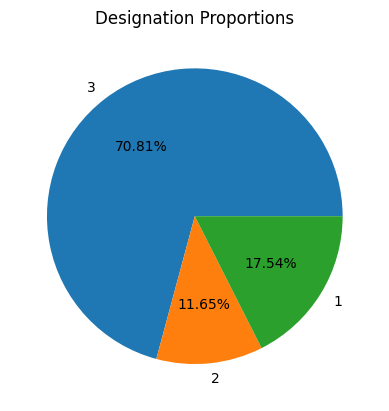

count  Percent
designation_flag                 
3                 108171    70.81
2                  17801    11.65
1                  26794    17.54

In [ ]:
pie_args= {
    'autopct':'%0.2f%%'}

plt_args = {'pie':pie_args,
            'title' : 'Designation Proportions',
            'show':None}

pieplot(df_final, plt_args, feature='designation_flag')

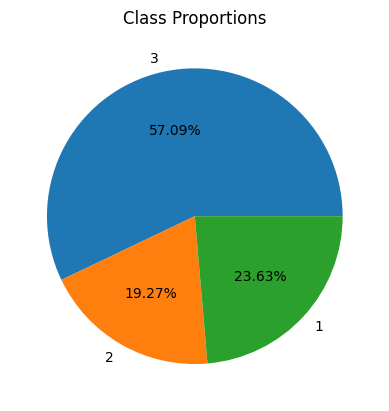

count  Percent
class_flag                
3           87255    57.09
2           29457    19.27
1           36116    23.63

In [ ]:
pie_args= {
    'autopct':'%0.2f%%'}

plt_args = {'pie':pie_args,
            'title' : 'Class Proportions',
            'show':None}

pieplot(df_final, plt_args, feature='class_flag')

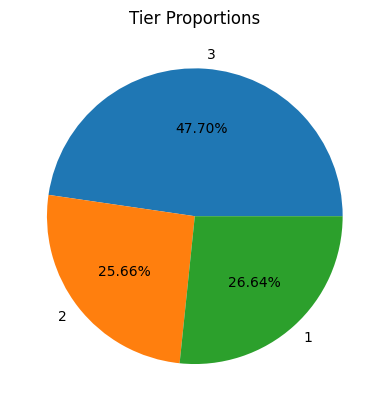

count  Percent
tier_flag                
3          97901    47.70
2          52680    25.66
1          54680    26.64

In [ ]:
pie_args= {
    'autopct':'%0.2f%%'}

plt_args = {'pie':pie_args,
            'title' : 'Tier Proportions',
            'show':None}

pieplot(df_final, plt_args, feature='tier_flag')

___
##<font color="9e1d73"><span><b>Analysis using count plot</b></span></font>

In [ ]:
df_final.head()

Features               company_hash  \
0                    atrgxnnt xzaxv   
1         qtrxvzwt xzegwgbb rxbxnta   
2                     ojzwnvwnxw vx   
3                         ngpgutaxv   
4                        qxen sqghu   

Features                                         email_hash  org_year  \
0         6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...      2016   
1         b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...      2018   
2         4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...      2015   
3         effdede7a2e7c2af664c8a31d9346385016128d66bbc58...      2017   
4         6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...      2017   

Features        ctc  job_position  ctc_updated_year  years_of_experience  \
0         1100000.0         other              2020                    8   
1          449999.0  fullstackdev              2019                    6   
2         2000000.0    backendeng              2020                    9   
3          700000.0    backendeng              2019                    7   
4         1400000.0  fullstackdev              2019                    7   

Features      ctc_mean  ctc_median  no_of_emp_in_grp    ctc_max    ctc_min  \
0         1.100000e+06   1100000.0                 1  1100000.0  1100000.0   
1         7.742856e+05    750000.0                 7  1200000.0   449999.0   
2         2.000000e+06   2000000.0                 1  2000000.0  2000000.0   
3         1.158571e+06   1200000.0                 7  1750000.0   700000.0   
4         1.400000e+06   1400000.0                 1  1400000.0  1400000.0   

Features designation_flag class_flag tier_flag  
0                       3          1         2  
1                       3          3         3  
2                       3          3         3  
3                       3          3         3  
4                       3          1         1

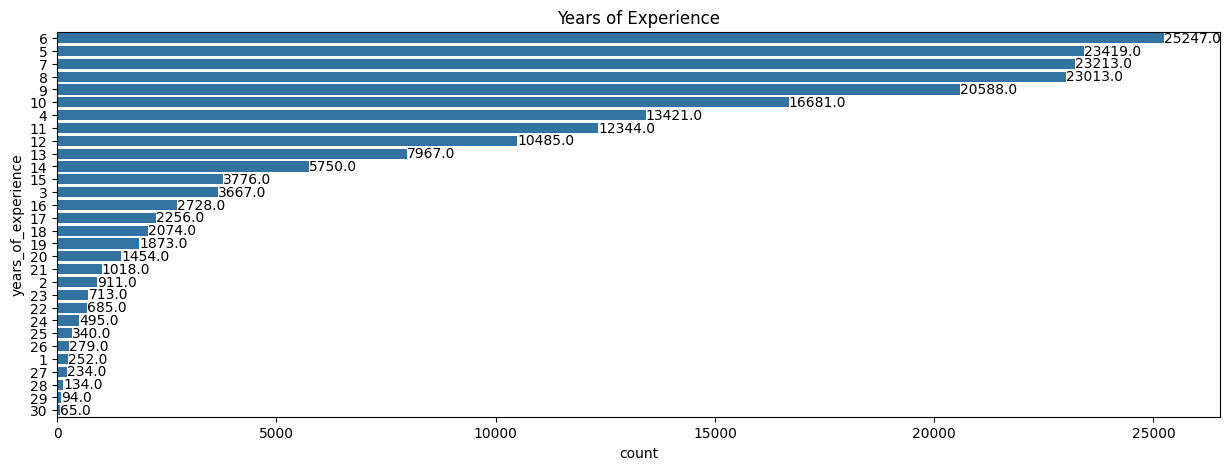

In [ ]:
plt_args = {'figure':{'figsize' :(15, 5)}, 'title' : 'Years of Experience','xticks':{'rotation':None}, 'show':None}
countplot_with_annotations(df_final, 'years_of_experience', plt_args, slice_values= (0,30), rotation=True)

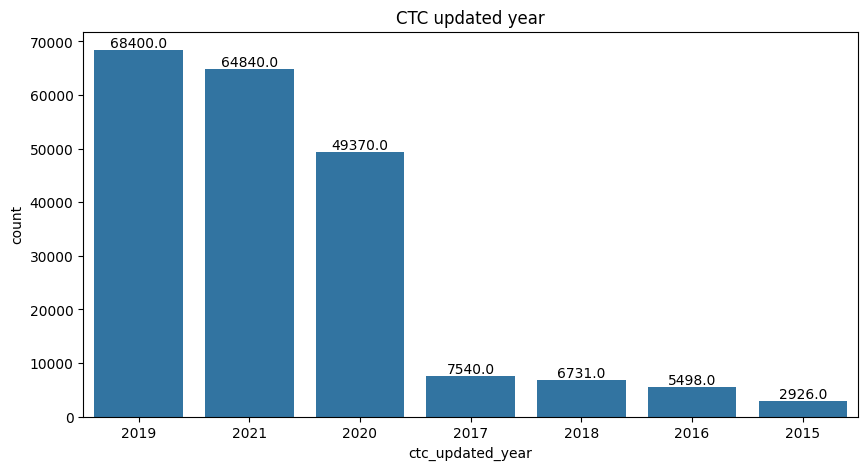

In [ ]:
plt_args = {'figure':{'figsize' :(10, 5)}, 'title' : 'CTC updated year','xticks':{'rotation':None}, 'show':None}
countplot_with_annotations(df_final, 'ctc_updated_year', plt_args, slice_values= None, rotation=False)

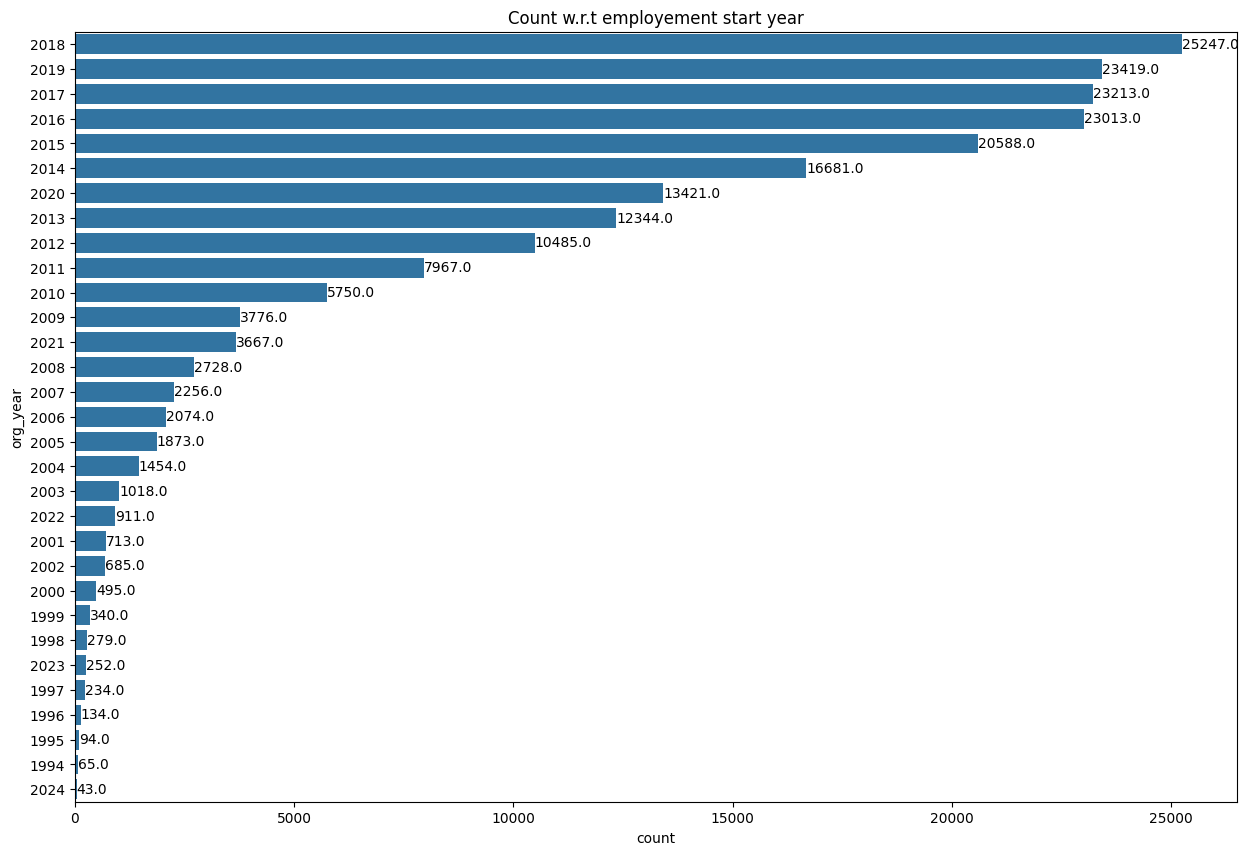

In [ ]:
plt_args = {'figure':{'figsize' :(15, 10)}, 'title' : 'Count w.r.t employement start year','xticks':{'rotation':None}, 'show':None}
countplot_with_annotations(df_final, 'org_year', plt_args, slice_values= None, rotation=True)

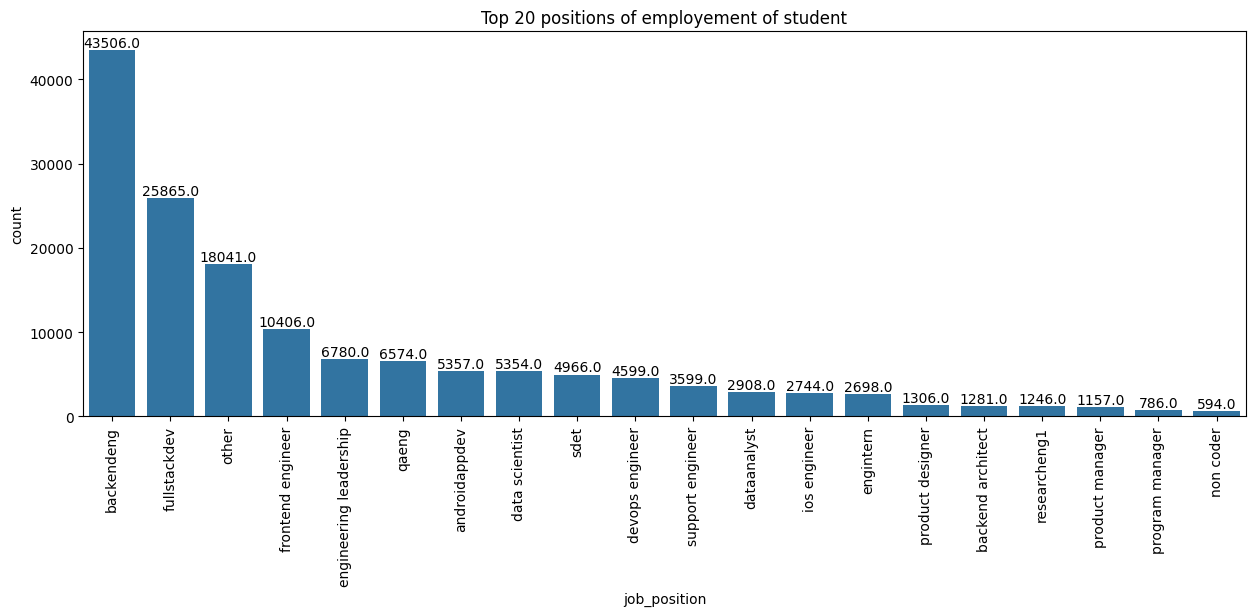

In [ ]:
plt_args = {'figure':{'figsize' :(15, 5)}, 'title' : 'Top 20 positions of employement of student','xticks':{'rotation':90},'show':None}
countplot_with_annotations(df_final, 'job_position', plt_args, slice_values= (1,21))

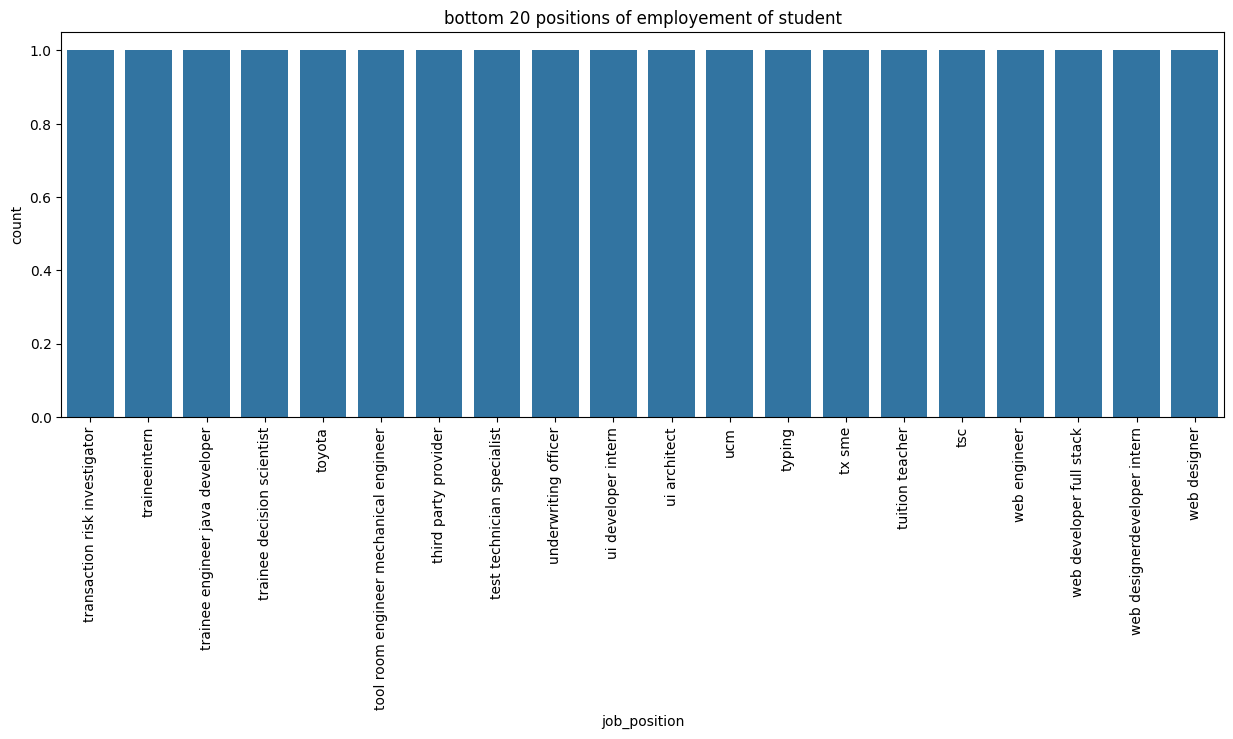

In [ ]:
plt_args = {'figure':{'figsize' :(15, 5)},'title' : 'bottom 20 positions of employement of student','xticks':{'rotation':90}, 'show':None}
countplot_with_annotations(df_final, 'job_position', plt_args, slice_values= (-1,-21,-1))

___
##<font color="9e1d73"><span><b>Analysis using box plot</b></span></font>

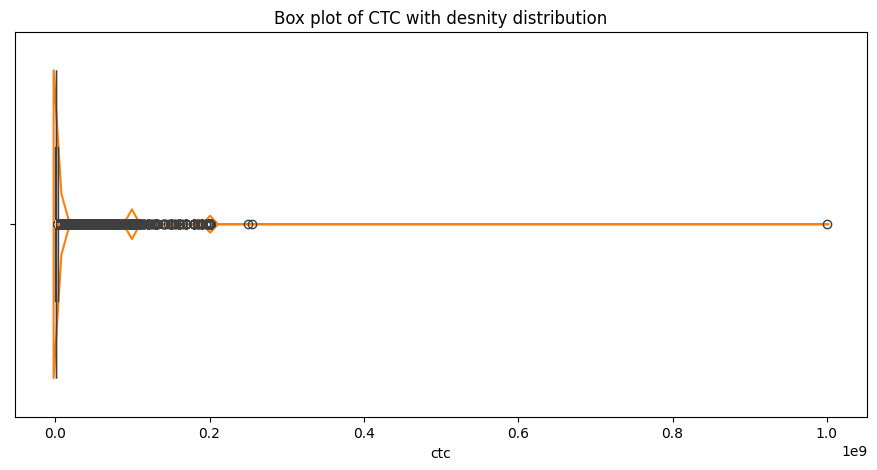

In [ ]:
plt.figure(figsize=(11,5))
plt.title('Box plot of CTC with desnity distribution')
sns.boxplot(x='ctc', data=df_final)
sns.violinplot(x='ctc', data=df_final, fill=False)
plt.show()

In [ ]:
df_final.head()

Features               company_hash  \
0                    atrgxnnt xzaxv   
1         qtrxvzwt xzegwgbb rxbxnta   
2                     ojzwnvwnxw vx   
3                         ngpgutaxv   
4                        qxen sqghu   

Features                                         email_hash  org_year  \
0         6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...      2016   
1         b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...      2018   
2         4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...      2015   
3         effdede7a2e7c2af664c8a31d9346385016128d66bbc58...      2017   
4         6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...      2017   

Features        ctc  job_position  ctc_updated_year  years_of_experience  \
0         1100000.0         other              2020                    8   
1          449999.0  fullstackdev              2019                    6   
2         2000000.0    backendeng              2020                    9   
3          700000.0    backendeng              2019                    7   
4         1400000.0  fullstackdev              2019                    7   

Features      ctc_mean  ctc_median  no_of_emp_in_grp    ctc_max    ctc_min  \
0         1.100000e+06   1100000.0                 1  1100000.0  1100000.0   
1         7.742856e+05    750000.0                 7  1200000.0   449999.0   
2         2.000000e+06   2000000.0                 1  2000000.0  2000000.0   
3         1.158571e+06   1200000.0                 7  1750000.0   700000.0   
4         1.400000e+06   1400000.0                 1  1400000.0  1400000.0   

Features designation_flag class_flag tier_flag  
0                       3          1         2  
1                       3          3         3  
2                       3          3         3  
3                       3          3         3  
4                       3          1         1

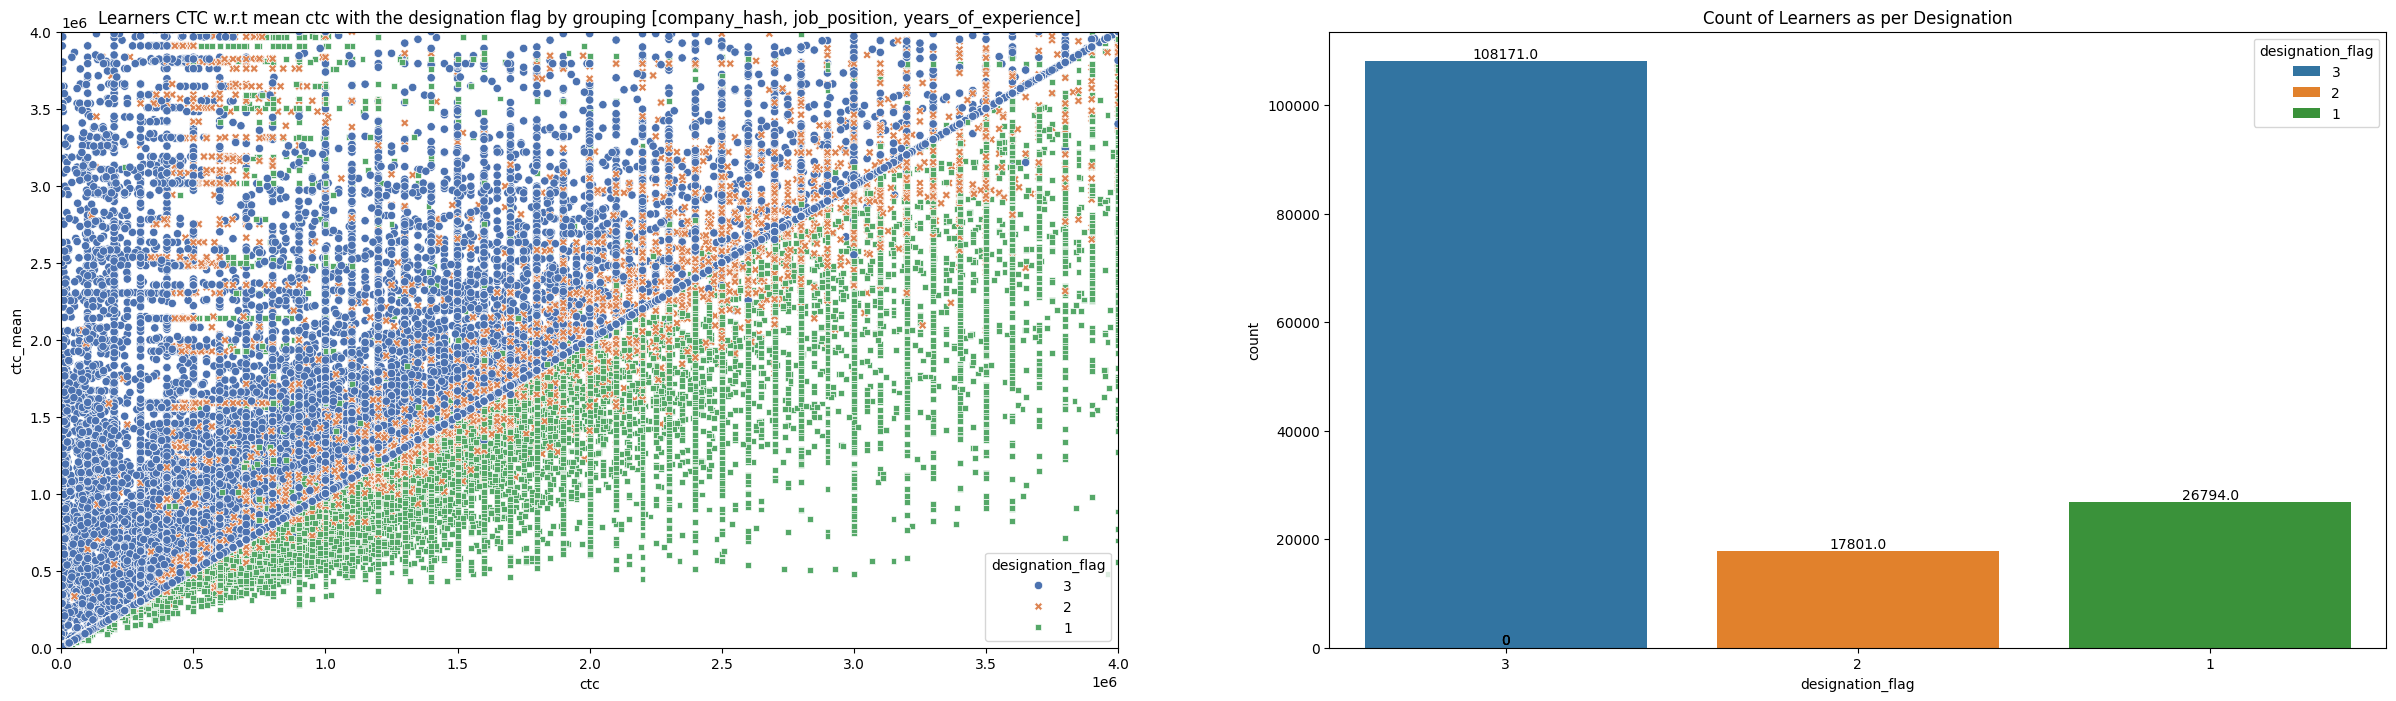

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(30,8))
axes[0].set_title('Learners CTC w.r.t mean ctc with the designation flag by grouping [company_hash, job_position, years_of_experience]')
sns.scatterplot(data=df_final, y='ctc_mean',x="ctc", hue="designation_flag",style='designation_flag',palette="deep", ax = axes[0])
axes[0].set_xlim(0, 4000000)
axes[0].set_ylim(0, 4000000)
axes[1].set_title('Count of Learners as per Designation')
ax = sns.countplot(data=df_final, x="designation_flag", ax = axes[1], hue='designation_flag')
annotate(ax)
plt.show()

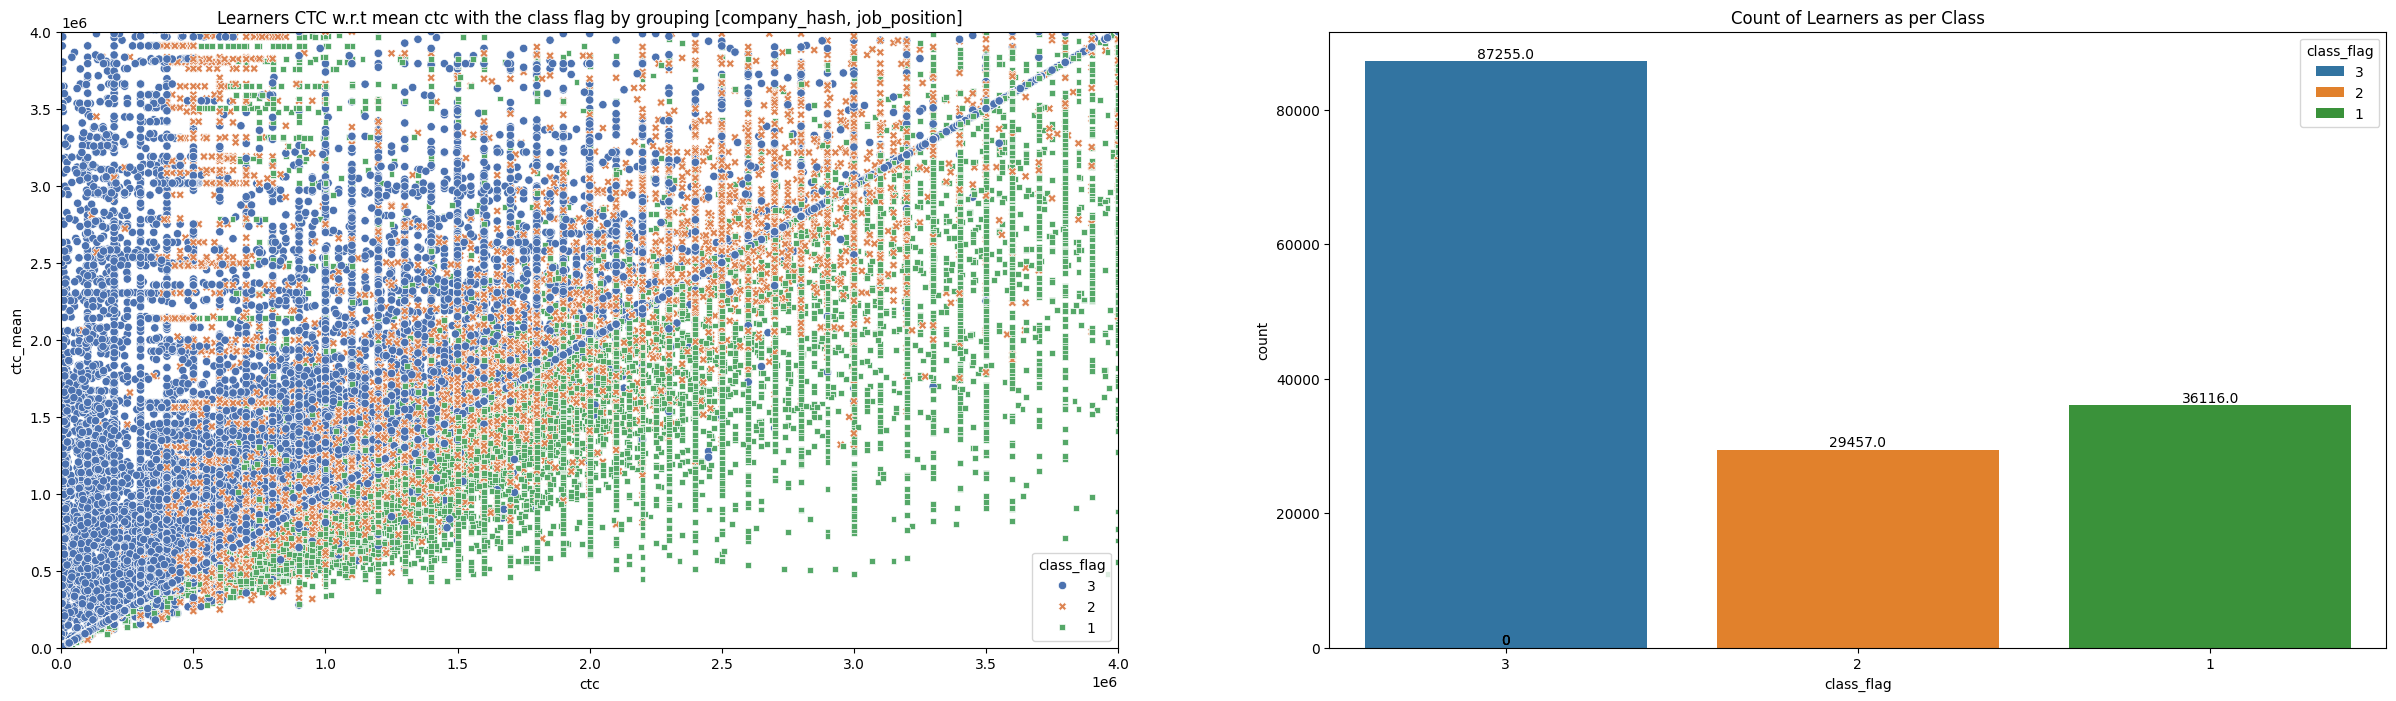

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(30,8))
axes[0].set_title('Learners CTC w.r.t mean ctc with the class flag by grouping [company_hash, job_position]')
sns.scatterplot(data=df_final, y='ctc_mean',x="ctc", hue="class_flag",style='class_flag',palette="deep", ax = axes[0])
axes[0].set_xlim(0, 4000000)
axes[0].set_ylim(0, 4000000)
axes[1].set_title('Count of Learners as per Class')
ax = sns.countplot(data=df_final, x="class_flag", ax = axes[1], hue='class_flag')
annotate(ax)
plt.show()

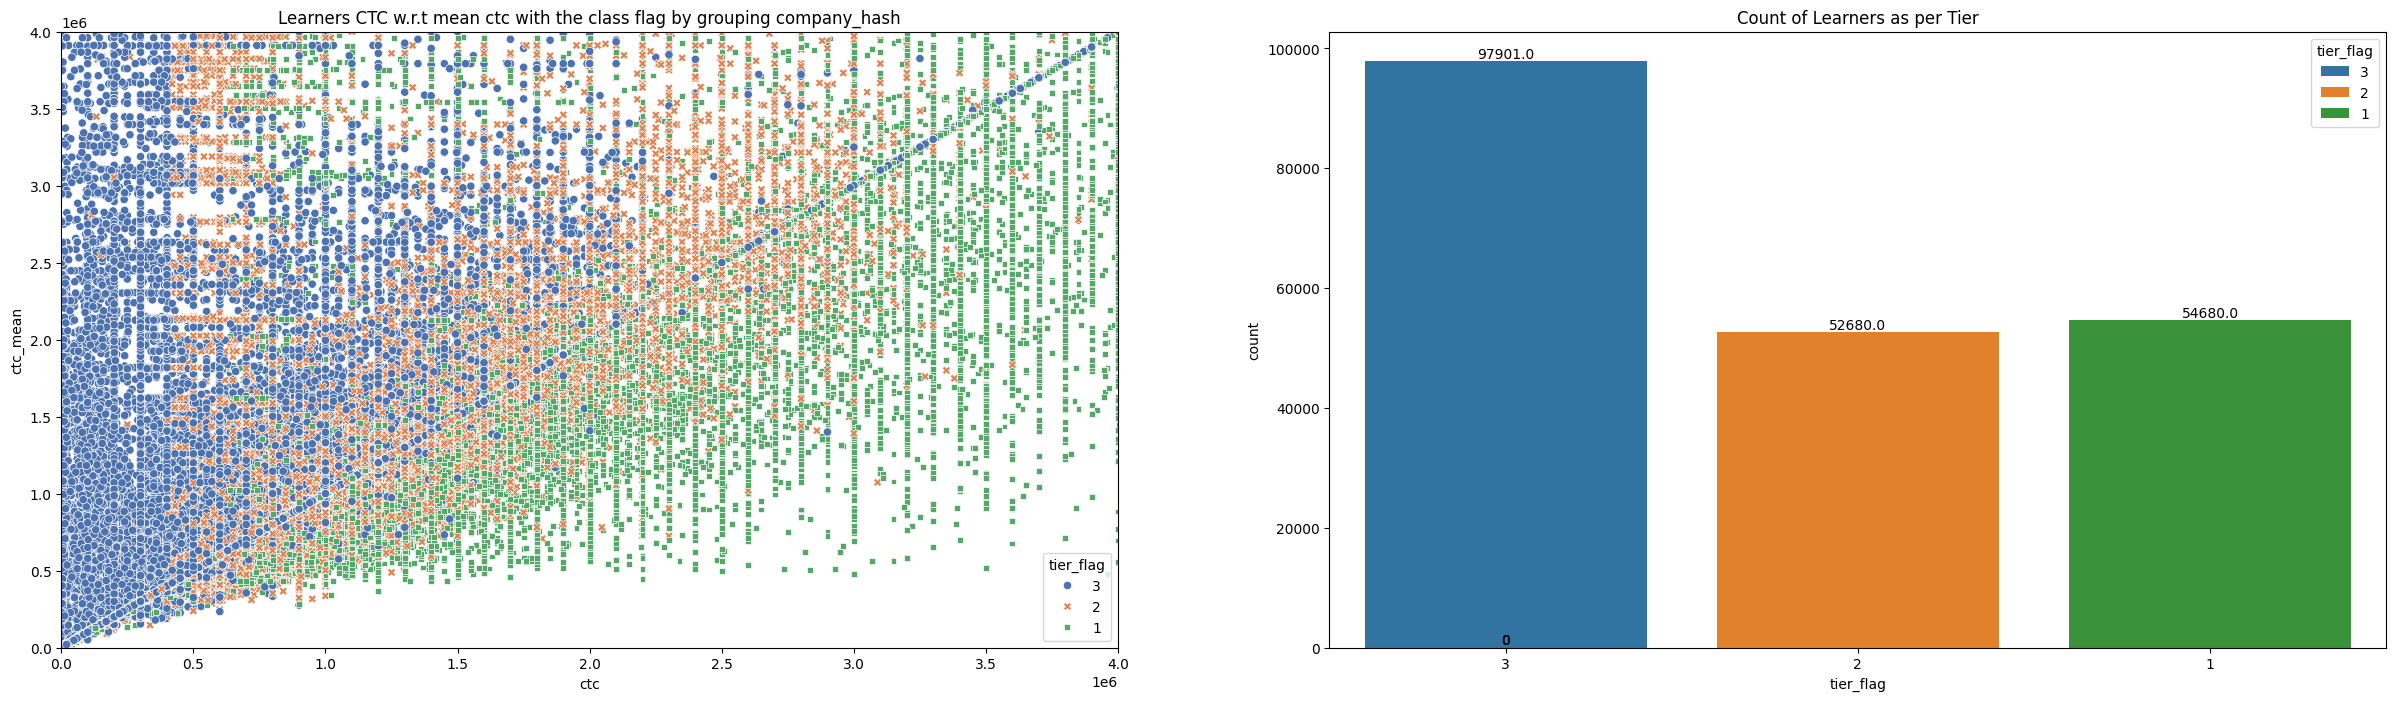

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(30,8))
axes[0].set_title('Learners CTC w.r.t mean ctc with the class flag by grouping company_hash')
sns.scatterplot(data=df_final, y='ctc_mean',x="ctc", hue="tier_flag",style='tier_flag',palette="deep", ax = axes[0])
axes[0].set_xlim(0, 4000000)
axes[0].set_ylim(0, 4000000)
axes[1].set_title('Count of Learners as per Tier')
ax = sns.countplot(data=df_final, x="tier_flag", ax = axes[1], hue='tier_flag')
annotate(ax)
plt.show()

**Top 10 employees in data science roles in Tier 1, earning more than their peers - Class 1**

In [ ]:
df_final[(df_final.job_position.isin(['associate data scientist', 'data scientist', 'senior data scientist'])) & \
         (df_final.tier_flag == 1) & \
         (df_final.class_flag == 1)].sort_values(by = ['ctc'], ascending = False)[:10]

Features                          company_hash  \
836       mqxonrtwgzt v bvyxzaqv sqghu wgbuvzj   
52738                                     zgzt   
31254               ihvaqvnxw xzoxsyno ucn rna   
122482                        xzzgcv ogrhnxgzo   
142975                                  ptzgbt   
151139                           ntwy bvyxzaqv   
57665                             wgqt wgbutnt   
152316                  zgn vuurxwvmrt vwwghzn   
32704                                  zvsvqqg   
16654                          ztfstz ogenfvqt   

Features                                         email_hash  org_year  \
836       cda8d723438e81185d2ee8c348870a4612eea974cdb2db...      2017   
52738     268a5aa92f0b6d0c675fc9cc1e300eb0c5930a3a139a23...      2022   
31254     bd222ea783ee372da4e0ad60fdccec0b8f37999a032025...      2015   
122482    6b6dd66bae787dd4dd417e1777f8ea5a057257e9019995...      2016   
142975    4ddef8762b7585c6ee7b8c06834778f3aa00eb3be312b0...      2020   
151139    6ad86d120e39db485331f9a0b2b1f15ce2a7bdaee778ab...      2021   
57665     75f5b46d47310c3923e93329a62a1aa78d478803f0a685...      2016   
152316    544e75b477f8644eb71281133c62c19732547837e80e51...      2021   
32704     15adaeb2eef9c0ee8a0f18e189bf426be390f5d1e911fd...      2021   
16654     3c64901d83458f3b7b8eed6fb529ee3a4c14d49339c398...      2017   

Features          ctc    job_position  ctc_updated_year  years_of_experience  \
836       200000000.0  data scientist              2020                    7   
52738     200000000.0  data scientist              2020                    2   
31254     200000000.0  data scientist              2019                    9   
122482    100000000.0  data scientist              2020                    8   
142975    100000000.0  data scientist              2019                    4   
151139    100000000.0  data scientist              2019                    3   
57665      99990000.0  data scientist              2021                    8   
152316     99900000.0  data scientist              2021                    3   
32704      60000000.0  data scientist              2021                    3   
16654      57780000.0  data scientist              2020                    7   

Features      ctc_mean   ctc_median  no_of_emp_in_grp      ctc_max  \
836       2.000000e+08  200000000.0                 1  200000000.0   
52738     6.803333e+07    4000000.0                 3  200000000.0   
31254     2.000000e+08  200000000.0                 1  200000000.0   
122482    5.040000e+07   50400000.0                 2  100000000.0   
142975    1.000000e+08  100000000.0                 1  100000000.0   
151139    1.000000e+08  100000000.0                 1  100000000.0   
57665     5.084500e+07   50845000.0                 2   99990000.0   
152316    1.441250e+07    1260000.0                 8   99900000.0   
32704     6.000000e+07   60000000.0                 1   60000000.0   
16654     5.778000e+07   57780000.0                 1   57780000.0   

Features      ctc_min designation_flag class_flag tier_flag  
836       200000000.0                3          1         1  
52738        100000.0                1          1         1  
31254     200000000.0                3          1         1  
122482       800000.0                1          1         1  
142975    100000000.0                3          1         1  
151139    100000000.0                3          1         1  
57665       1700000.0                1          1         1  
152316       150000.0                1          1         1  
32704      60000000.0                3          1         1  
16654      57780000.0                3          1         1

**Bottom 10 employees in Tier 1, earning lesser than their peers**

In [ ]:
df_final[(df_final.job_position.isin(['associate data scientist', 'data scientist', 'senior data scientist'])) & \
         (df_final.tier_flag == 1) & \
         (df_final.class_flag == 1)].sort_values(by = ['ctc'], ascending = True)[:10]

Features           company_hash  \
70761                   urhbxzw   
124879               xzatrrxtzn   
126487               phnnvzvavz   
186897     nvnqvo avnv otqcxwto   
175562             xzzgavnvnxwo   
200979                 vzmrxwpo   
134526                  cxaggrj   
189702     uxcgnwyvxz ogrhnxgzo   
127159    nyt ouvqpo eghzavnxgz   
199300                  xzegojo   

Features                                         email_hash  org_year  \
70761     89c50595727487bfa7d687bb168d2c2b55a57646876a4d...      2017   
124879    cafbe82bdd822f80cdf232311a09fb8d8c6ccdac5786f2...      2018   
126487    db494a7dc655b62838d1941ad59b4630422ee8c9251e55...      2019   
186897    5a6bb301b8026e0f0ee2e458b85cb7d8d7ec4e4fad9ed0...      2019   
175562    d9c08aa8a0ff9e88847d5b568750491bf5f345f6db05c6...      2016   
200979    f661bffc2d7114f9caa08fe09649276a88d5865b150dc9...      2017   
134526    4e24a4e775bbc933e5eff9535be540dc876327d5a4e0d2...      2019   
189702    cc883968c606fcd2fbf26f2d3d59fbdf040f0446d48a1a...      2018   
127159    5a5d636daf257e548310b7efb75e2928e583532c213376...      2020   
199300    6cbaed82a11d93d09e6cc267555415ba8d0ff43e52c6aa...      2012   

Features       ctc    job_position  ctc_updated_year  years_of_experience  \
70761     155000.0  data scientist              2018                    7   
124879    180000.0  data scientist              2019                    6   
126487    340000.0  data scientist              2019                    5   
186897    500000.0  data scientist              2019                    5   
175562    600000.0  data scientist              2019                    8   
200979    600000.0  data scientist              2019                    7   
134526    600000.0  data scientist              2018                    5   
189702    600000.0  data scientist              2019                    6   
127159    650000.0  data scientist              2021                    4   
199300    650000.0  data scientist              2019                   12   

Features       ctc_mean  ctc_median  no_of_emp_in_grp   ctc_max   ctc_min  \
70761     140000.000000    140000.0                 2  155000.0  125000.0   
124879    145000.000000    145000.0                 2  180000.0  110000.0   
126487    320000.000000    320000.0                 2  340000.0  300000.0   
186897    475000.000000    475000.0                 2  500000.0  450000.0   
175562    600000.000000    600000.0                 1  600000.0  600000.0   
200979    600000.000000    600000.0                 1  600000.0  600000.0   
134526    466666.666667    400000.0                 3  600000.0  400000.0   
189702    600000.000000    600000.0                 1  600000.0  600000.0   
127159    650000.000000    650000.0                 1  650000.0  650000.0   
199300    668333.333333    650000.0                 3  915000.0  440000.0   

Features designation_flag class_flag tier_flag  
70761                   1          1         1  
124879                  1          1         1  
126487                  1          1         1  
186897                  1          1         1  
175562                  3          1         1  
200979                  3          1         1  
134526                  1          1         1  
189702                  3          1         1  
127159                  3          1         1  
199300                  2          1         1

**Bottom 10 employees in Tier 3, earning lesser than their peers**

In [ ]:
df_final[(df_final.tier_flag == 3)].sort_values(by = ['ctc'], ascending = True)[:10]

Features              company_hash  \
135132                xzntqcxtfmxn   
117989                xzntqcxtfmxn   
113924                xzntqcxtfmxn   
184486                          xm   
54736          uqvpqxnx voogwxvnto   
91381                    ftm ongqt   
116703    hzxctqoxnj ge fvoyxzsngz   
166002                 vcvzn sqghu   
81880              uqgmrtb ogrcxzs   
150327                         zvz   

Features                                         email_hash  org_year    ctc  \
135132    3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...      2014    2.0   
117989    f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...      2013    6.0   
113924    23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...      2013   14.0   
184486    b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...      2016   15.0   
54736     8786759b95d673466e94f62f1b15e4f8c6bd7de6164074...      2020   24.0   
91381     512f761579fb116e215cabc9821c7f81153f0763e16018...      2016   25.0   
116703    f7e5e788676100d7c4146740ada9e2f8974defc01f571d...      2022  200.0   
166002    c411a6917058b50f44d7c62751be9b232155b23211de4c...      2013  300.0   
81880     edcfb902656b736e1f35863298706d9d34ee795b7ed85a...      2018  500.0   
150327    9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...      2023  600.0   

Features            job_position  ctc_updated_year  years_of_experience  \
135132                backendeng              2019                   10   
117989                       nan              2018                   11   
113924                       nan              2018                   11   
184486                       nan              2018                    8   
54736                      other              2020                    4   
91381              androidappdev              2018                    8   
116703                       nan              2021                    2   
166002    database administrator              2019                   11   
81880                  cofounder              2019                    6   
150327                       nan              2019                    1   

Features      ctc_mean  ctc_median  no_of_emp_in_grp    ctc_max  ctc_min  \
135132    1.000001e+06   1000001.0                 2  2000000.0      2.0   
117989    1.000000e+01        10.0                 2       14.0      6.0   
113924    1.000000e+01        10.0                 2       14.0      6.0   
184486    1.500000e+01        15.0                 1       15.0     15.0   
54736     2.400000e+01        24.0                 1       24.0     24.0   
91381     2.500000e+01        25.0                 1       25.0     25.0   
116703    2.000000e+02       200.0                 1      200.0    200.0   
166002    3.000000e+02       300.0                 1      300.0    300.0   
81880     5.000000e+02       500.0                 1      500.0    500.0   
150327    2.291873e+06   2200000.0                11  7500000.0    600.0   

Features designation_flag class_flag tier_flag  
135132                  3          3         3  
117989                NaN        NaN         3  
113924                NaN        NaN         3  
184486                NaN        NaN         3  
54736                   3          3         3  
91381                   3          3         3  
116703                NaN        NaN         3  
166002                  3          3         3  
81880                   3          3         3  
150327                NaN        NaN         3

**Top 10 employees in X department - having 5/6/7 years of experience earning more than their peers in Tier X**

In [ ]:
df_final[df_final.years_of_experience.isin([5,6,7])].sort_values(by = ['ctc'], ascending = False)[:10]

Features                          company_hash  \
117389                            obvqnuqxdwgb   
88595                                  eqtoytq   
10455                                   sggsrt   
86101                                  eqtoytq   
11719                            yvfrtq uvwptq   
23032                                  egdwgzz   
1083                                 vwwtznhqt   
11985     axctqoxexta tztqsj ogrhnxgzo ucn rna   
45902            ntwywg egqbtqrj ntwy wgwpnvxr   
46297               egxft xzeg srgmvr ogrhnxgz   

Features                                         email_hash  org_year  \
117389    5b4bed51797140db4ed52018a979db1e34cee49e27b488...      2018   
88595     9a21414cdaa55bd8fae0eca911ccb3ab2a132be8f4e74d...      2019   
10455     35cabddba75a014e0fced77203b5653630b0f49a27f3b3...      2019   
86101     9a21414cdaa55bd8fae0eca911ccb3ab2a132be8f4e74d...      2019   
11719     61670b8a6f2725f811a41b8c0514d2447a55ddde0e3671...      2018   
23032     05a0aec8db0d251460a2e200d835b7818e050308ef1e67...      2018   
1083      a071c4cd6d423e8d1841ba6133e6c4684f4eaba7dc1526...      2017   
11985     83f825e4d64d19bd374ea9ea4d5a16a0a22c08eb92e7ca...      2018   
45902     47d993914804e1a737d4af1b877ebb7f6867e39134d6d7...      2019   
46297     2889db270a82988524c61a2e13360724a3f3efa565d5f1...      2019   

Features          ctc            job_position  ctc_updated_year  \
117389    255555555.0                     nan              2016   
88595     200000000.0                   other              2019   
10455     200000000.0            fullstackdev              2020   
86101     200000000.0                     nan              2019   
11719     200000000.0                   other              2021   
23032     200000000.0  engineering leadership              2020   
1083      200000000.0              backendeng              2020   
11985     200000000.0                   other              2020   
45902     200000000.0              backendeng              2019   
46297     200000000.0                     nan              2020   

Features  years_of_experience      ctc_mean   ctc_median  no_of_emp_in_grp  \
117389                      6  1.289778e+08  128977777.5                 2   
88595                       5  1.588000e+06     650000.0               270   
10455                       5  4.400000e+07    7300000.0                 5   
86101                       5  2.126192e+06     905000.0               224   
11719                       6  2.000000e+08  200000000.0                 1   
23032                       6  2.000000e+08  200000000.0                 1   
1083                        7  3.015964e+06     570000.0                84   
11985                       6  2.000000e+08  200000000.0                 1   
45902                       5  2.000000e+08  200000000.0                 1   
46297                       5  2.000000e+08  200000000.0                 1   

Features      ctc_max      ctc_min designation_flag class_flag tier_flag  
117389    255555555.0    2400000.0              NaN        NaN         1  
88595     200000000.0     180000.0                1          1         1  
10455     200000000.0    1300000.0                1          1         1  
86101     200000000.0      13000.0              NaN        NaN         1  
11719     200000000.0  200000000.0                3          3         3  
23032     200000000.0  200000000.0                3          3         1  
1083      200000000.0     250000.0                1          1         1  
11985     200000000.0  200000000.0                3          3         3  
45902     200000000.0  200000000.0                3          3         1  
46297     200000000.0  200000000.0              NaN        NaN         1

**Top 10 companies (based on their CTC)**

In [ ]:
df_final.sort_values(by = ['ctc'], ascending = False)[:10][['company_hash','job_position','ctc']]

Features                       company_hash            job_position  \
72704          whmxw rgsxwo uqxcvnt rxbxnta                     nan   
117389                         obvqnuqxdwgb                     nan   
3299      aveegaxr xzntqzvnxgzvr hzxctqoxnj                     nan   
104678            nvnv wgzohrnvzwj otqcxwto  engineering leadership   
4084                    eqttrvzwt atctrgutq            researcheng1   
5843                 srv hzxctqoxnj bvnyhqv              backendeng   
5887            xzaxv ugftq wgqugqvnxgz rna                   other   
11782                        mvlvl vhng rna  engineering leadership   
11762              egd z wrgha ntwyzgrgsxto                   qaeng   
30524             nvnv wgzohrnvzwj otqcxwto                     nan   

Features           ctc  
72704     1.000150e+09  
117389    2.555556e+08  
3299      2.500000e+08  
104678    2.000000e+08  
4084      2.000000e+08  
5843      2.000000e+08  
5887      2.000000e+08  
11782     2.000000e+08  
11762     2.000000e+08  
30524     2.000000e+08

**Top 2 positions in every company (based on their CTC)**

In [ ]:
df_final['rank'] = df_final.groupby(['company_hash','job_position'])['ctc'] \
                      .rank(method='dense', ascending=False)
df_final['rank'] = pd.to_numeric(df_final['rank'], errors='coerce').astype('Int64')

df_final[(df_final['rank'] == 1) | (df_final['rank'] == 2)].sort_values(by = ['company_hash',\
                                                                              'job_position','ctc'], \
                                                                        ascending = [True,True,False])

<ipython-input-48-6ffb97dc5273>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final['rank'] = df_final.groupby(['company_hash','job_position'])['ctc'] \


Features                  company_hash  \
2938                                 0   
16800                                0   
197030                            0000   
74303                       01 ojztqsj   
55154                       01 ojztqsj   
...                                ...   
14650                               zz   
4373                                zz   
72863     zzb ztdnstz vacxogqj ucn rna   
146295    zzb ztdnstz vacxogqj ucn rna   
116780                          zzgato   

Features                                         email_hash  org_year  \
2938      e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...      2020   
16800     e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...      2020   
197030    b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...      2017   
74303     819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...      2016   
55154     e1e15fada844f35fcc33927343d0c80f55526b87c40eee...      2011   
...                                                     ...       ...   
14650     d6923a6f81c7b36615d9f14349fe01aec442029b2c502f...      2009   
4373      7d4588453bc463b39db8c77ef0f856957fc42f5d54cae4...      2013   
72863     ca8935e2314a1bac3947e60bbd2ee10524112898da29eb...      2017   
146295    ca8935e2314a1bac3947e60bbd2ee10524112898da29eb...      2017   
116780    d421e52125f8057c65fa554752be03b056221c8590ff26...      2014   

Features        ctc       job_position  ctc_updated_year  years_of_experience  \
2938       100000.0                nan              2020                    4   
16800      100000.0              other              2020                    4   
197030     300000.0              other              2020                    7   
74303      270000.0      androidappdev              2019                    8   
55154      830000.0  frontend engineer              2019                   13   
...             ...                ...               ...                  ...   
14650      500000.0                nan              2021                   15   
4373      1370000.0              other              2020                   11   
72863      600000.0       fullstackdev              2021                    7   
146295     600000.0                nan              2021                    7   
116780     130000.0                nan              2017                   10   

Features   ctc_mean  ctc_median  no_of_emp_in_grp    ctc_max    ctc_min  \
2938       100000.0    100000.0                 1   100000.0   100000.0   
16800      100000.0    100000.0                 1   100000.0   100000.0   
197030     300000.0    300000.0                 1   300000.0   300000.0   
74303      270000.0    270000.0                 1   270000.0   270000.0   
55154      830000.0    830000.0                 1   830000.0   830000.0   
...             ...         ...               ...        ...        ...   
14650      500000.0    500000.0                 1   500000.0   500000.0   
4373      1370000.0   1370000.0                 1  1370000.0  1370000.0   
72863      600000.0    600000.0                 1   600000.0   600000.0   
146295     600000.0    600000.0                 1   600000.0   600000.0   
116780     130000.0    130000.0                 1   130000.0   130000.0   

Features designation_flag class_flag tier_flag  rank  
2938                  NaN        NaN         3     1  
16800                   3          3         3     1  
197030                  3          3         3     1  
74303                   3          3         3     1  
55154                   3          3         1     1  
...                   ...        ...       ...   ...  
14650                 NaN        NaN         3     1  
4373                    3          3         1     1  
72863                   3          3         3     1  
146295                NaN        NaN         3     1  
116780                NaN        NaN         3     1  

[88418 rows x 16 columns]

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205305 entries, 0 to 205304
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   company_hash         205261 non-null  object  
 1   email_hash           205305 non-null  object  
 2   org_year             205219 non-null  Int64   
 3   ctc                  205305 non-null  float64 
 4   job_position         205305 non-null  category
 5   ctc_updated_year     205305 non-null  Int64   
 6   years_of_experience  205219 non-null  Int64   
 7   ctc_mean             205175 non-null  float64 
 8   ctc_median           205175 non-null  float64 
 9   no_of_emp_in_grp     205175 non-null  Int64   
 10  ctc_max              205175 non-null  float64 
 11  ctc_min              205175 non-null  float64 
 12  designation_flag     152766 non-null  category
 13  class_flag           152828 non-null  category
 14  tier_flag            205261 non-null  category
 15  

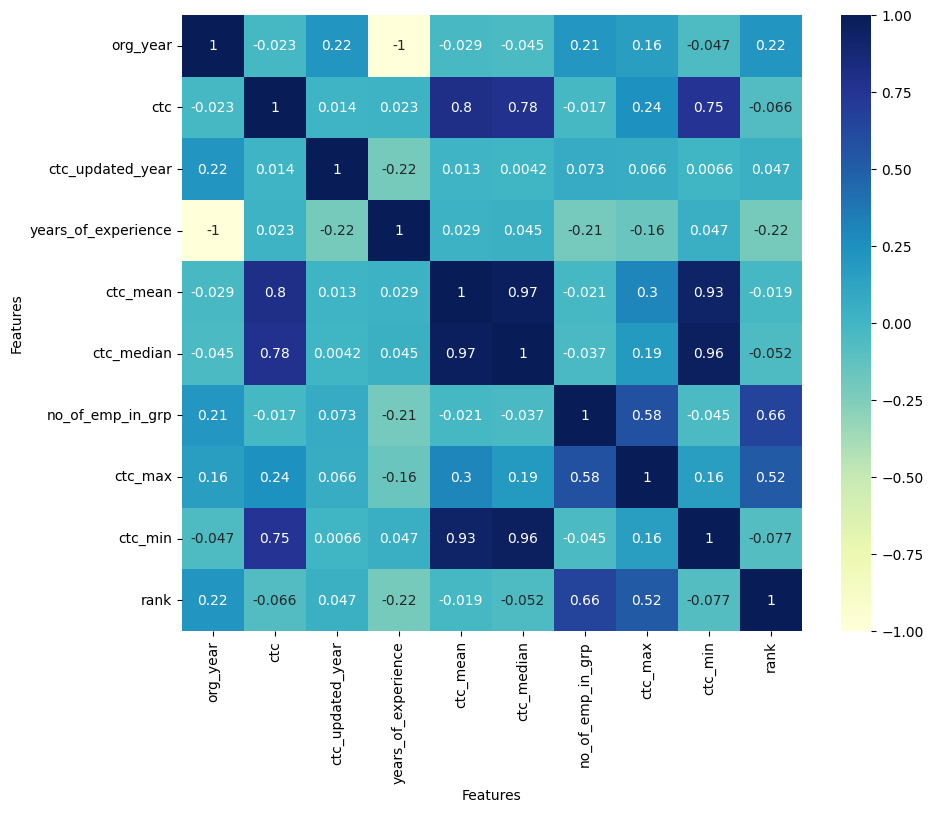

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df_final[['org_year', 'ctc', 'ctc_updated_year', 'years_of_experience','ctc_mean', 'ctc_median', 'no_of_emp_in_grp', 'ctc_max', 'ctc_min', 'rank']].corr(), annot=True, cmap='YlGnBu')
plt.show()

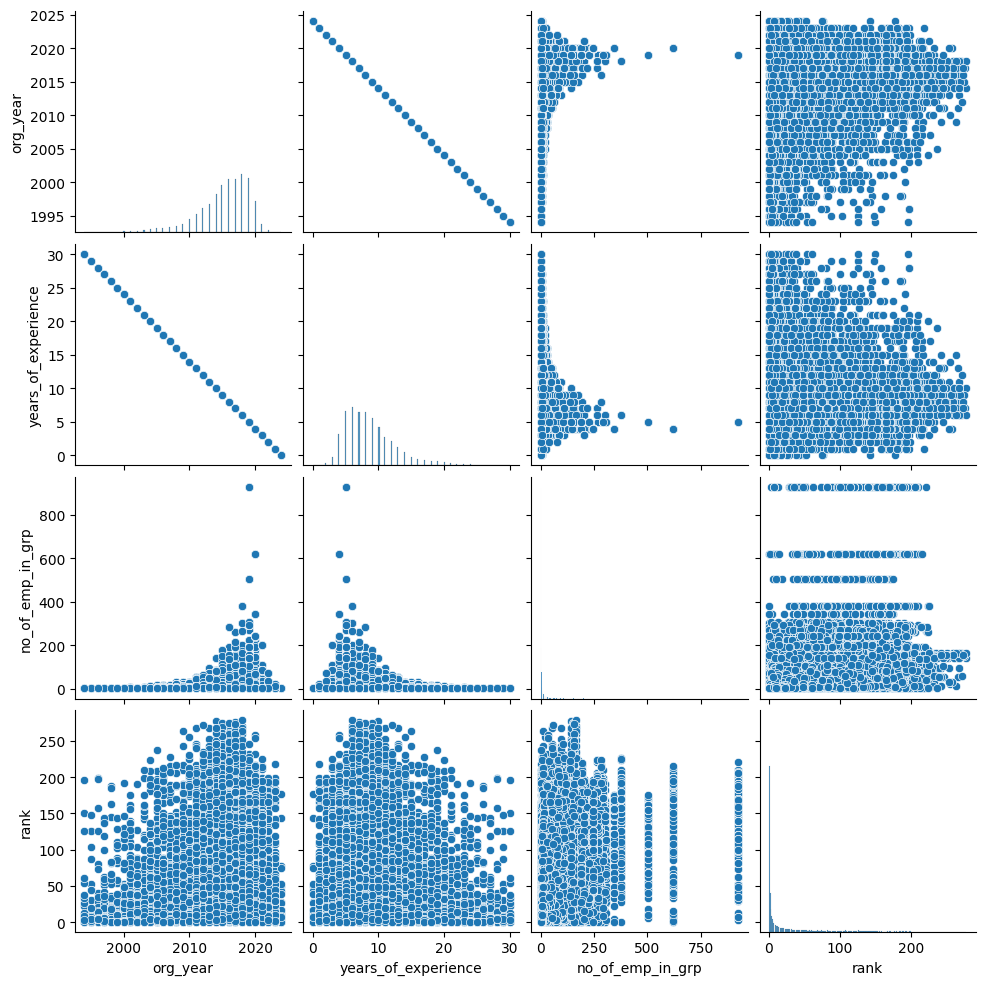

In [ ]:
sns.pairplot(df_final[['org_year', 'years_of_experience', 'no_of_emp_in_grp', 'rank']])
plt.show()

#<font color="#b7cd26"><span><b>Data Pre-Processing</b></span></font>

In [ ]:
df_final.head()

Features               company_hash  \
0                    atrgxnnt xzaxv   
1         qtrxvzwt xzegwgbb rxbxnta   
2                     ojzwnvwnxw vx   
3                         ngpgutaxv   
4                        qxen sqghu   

Features                                         email_hash  org_year  \
0         6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...      2016   
1         b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...      2018   
2         4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...      2015   
3         effdede7a2e7c2af664c8a31d9346385016128d66bbc58...      2017   
4         6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...      2017   

Features        ctc  job_position  ctc_updated_year  years_of_experience  \
0         1100000.0         other              2020                    8   
1          449999.0  fullstackdev              2019                    6   
2         2000000.0    backendeng              2020                    9   
3          700000.0    backendeng              2019                    7   
4         1400000.0  fullstackdev              2019                    7   

Features      ctc_mean  ctc_median  no_of_emp_in_grp    ctc_max    ctc_min  \
0         1.100000e+06   1100000.0                 1  1100000.0  1100000.0   
1         7.742856e+05    750000.0                 7  1200000.0   449999.0   
2         2.000000e+06   2000000.0                 1  2000000.0  2000000.0   
3         1.158571e+06   1200000.0                 7  1750000.0   700000.0   
4         1.400000e+06   1400000.0                 1  1400000.0  1400000.0   

Features designation_flag class_flag tier_flag  rank  
0                       3          1         2     1  
1                       3          3         3    20  
2                       3          3         3     1  
3                       3          3         3    19  
4                       3          1         1     1

##<font color="#9e1d73"><span><b>Removing Highly Correlated Features</b></span>

In [ ]:
high_correlated_features = ['years_of_experience', 'ctc_mean','ctc_median']
df_final.drop(columns=high_correlated_features, inplace=True)
print(Style.BRIGHT+Back.RED+Fore.WHITE+'Following Features are very highly correlated with other features, Hence dropped.\n')
for i in high_correlated_features:
  print(Back.WHITE+Fore.BLUE+i, '\n')
display(df_final.head(2))

Following Features are very highly correlated with other features, Hence dropped.

years_of_experience 

ctc_mean 

ctc_median 



Features               company_hash  \
0                    atrgxnnt xzaxv   
1         qtrxvzwt xzegwgbb rxbxnta   

Features                                         email_hash  org_year  \
0         6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...      2016   
1         b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...      2018   

Features        ctc  job_position  ctc_updated_year  no_of_emp_in_grp  \
0         1100000.0         other              2020                 1   
1          449999.0  fullstackdev              2019                 7   

Features    ctc_max    ctc_min designation_flag class_flag tier_flag  rank  
0         1100000.0  1100000.0                3          1         2     1  
1         1200000.0   449999.0                3          3         3    20

##<font color="#9e1d73"><span><b>Removing the columns which are created for manual clustering purpose</b></span>

In [ ]:
manual_clustered_columns = ['no_of_emp_in_grp',	'ctc_max', 'ctc_min', 'designation_flag',	'class_flag', 'tier_flag',	'rank']
df_final.drop(columns = manual_clustered_columns, inplace = True)
print(Style.BRIGHT+Back.RED+Fore.WHITE+'Following Features which are created for manual clustering, Hence dropped.\n')
for i in manual_clustered_columns:
  print(Back.WHITE+Fore.BLUE+i, '\n')
display(df_final.head(2))

Following Features which are created for manual clustering, Hence dropped.

no_of_emp_in_grp 

ctc_max 

ctc_min 

designation_flag 

class_flag 

tier_flag 

rank 



Features               company_hash  \
0                    atrgxnnt xzaxv   
1         qtrxvzwt xzegwgbb rxbxnta   

Features                                         email_hash  org_year  \
0         6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...      2016   
1         b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...      2018   

Features        ctc  job_position  ctc_updated_year  
0         1100000.0         other              2020  
1          449999.0  fullstackdev              2019

##<font color="#9e1d73"><span><b>Removing other redudant columns for modelling</b></span>

In [ ]:
other_redundant_columns = ['email_hash']
df_final.drop(columns = other_redundant_columns, inplace = True)
print(Style.BRIGHT+Back.RED+Fore.WHITE+"modelling by using the 'email_hash' doesn't make sense, Hence dropped.\n")
for i in other_redundant_columns:
  print(Back.WHITE+Fore.BLUE+i, '\n')
display(df_final.head(2))

modelling by using the 'email_hash' doesn't make sense, Hence dropped.

email_hash 



Features               company_hash  org_year        ctc  job_position  \
0                    atrgxnnt xzaxv      2016  1100000.0         other   
1         qtrxvzwt xzegwgbb rxbxnta      2018   449999.0  fullstackdev   

Features  ctc_updated_year  
0                     2020  
1                     2019

##<font color="#9e1d73"><span><b>Outliers Treatment</b></span>
*   Detect Outliers
*   Handle Outliers

>From the above uni-variate and bi-variate analysis we can observe that all the numerical features has soo many outliers.


In [ ]:
def treat_outliers_iqr(dataframe, column, method="remove", capping_value=None):
    """
    Treat outliers in a column using the IQR method.

    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.
        column (str): The column to treat outliers in.
        method (str): "remove" to drop outliers, "cap" to cap them. Default is "remove".
        capping_value (float): Optional multiplier for IQR (default: 1.5).

    Returns:
        pd.DataFrame: DataFrame with outliers treated.
    """
    if capping_value is None:
        capping_value = 1.5  # Default multiplier for IQR

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - capping_value * IQR
    upper_bound = Q3 + capping_value * IQR

    if method == "remove":
        # Remove rows with outliers
        return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    elif method == "cap":
        # Cap outliers to lower/upper bounds
        dataframe[column] = dataframe[column].clip(lower=lower_bound, upper=upper_bound)
        return dataframe
    else:
        raise ValueError("Method should be 'remove' or 'cap'.")

df_cleaned = treat_outliers_iqr(df_final, column="ctc", method="cap", capping_value=1.5)
df_cleaned = treat_outliers_iqr(df_final, column="ctc", method="cap", capping_value=1.5)


##<font color="#9e1d73"><span><b>Sanity check after handling outliers for 'ctc' column</b></span>

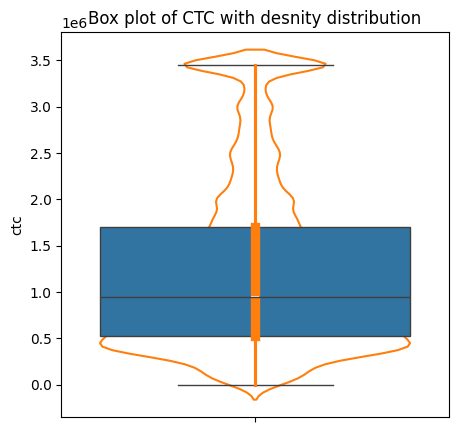

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Box plot of CTC with desnity distribution')
sns.boxplot(y='ctc', data=df_final)
sns.violinplot(y='ctc', data=df_final, fill=False)
plt.show()

In [ ]:
df_final.head()

Features               company_hash  org_year        ctc  job_position  \
0                    atrgxnnt xzaxv      2016  1100000.0         other   
1         qtrxvzwt xzegwgbb rxbxnta      2018   449999.0  fullstackdev   
2                     ojzwnvwnxw vx      2015  2000000.0    backendeng   
3                         ngpgutaxv      2017   700000.0    backendeng   
4                        qxen sqghu      2017  1400000.0  fullstackdev   

Features  ctc_updated_year  
0                     2020  
1                     2019  
2                     2020  
3                     2019  
4                     2019

##<font color="#9e1d73"><span><b>KNN Impuatation</b></span>

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import numpy as np

# Initialize LabelEncoder and KNNImputer
le = LabelEncoder()
imputer = KNNImputer(n_neighbors=4)

num_columns_final = []
cat_columns = ['company_hash', 'job_position']  # Categorical columns
num_columns = ['org_year', 'ctc', 'ctc_updated_year']  # Numerical columns

# Encode categorical columns and handle 'NaN' values
encoded_column_mapping = {}  # To store LabelEncoder for each categorical column
for cat_col in cat_columns:
    le = LabelEncoder()
    df_final[f'{cat_col}_encoded'] = le.fit_transform(df_final[cat_col].astype(str))
    # Replace 'nan' encoded value with np.NaN
    nan_encoded = le.transform(['nan'])[0]
    df_final[f'{cat_col}_encoded'] = df_final[f'{cat_col}_encoded'].replace(nan_encoded, np.NaN)
    encoded_column_mapping[cat_col] = le  # Save the encoder for later use

# Create the final list of numerical columns for KNN Imputation
encoded_columns = df_final.columns[df_final.columns.str.contains('encoded')]
num_columns_final.extend(num_columns)
num_columns_final.extend(encoded_columns)

# Apply KNN Imputation
df_final[num_columns_final] = imputer.fit_transform(df_final[num_columns_final])

# Convert imputed numerical columns back to integers (optional)
for num_col in num_columns_final:
    df_final[num_col] = df_final[num_col].round().astype(int)

# Decode the categorical columns back to original categories
for cat_col in cat_columns:
    encoded_col = f'{cat_col}_encoded'
    le = encoded_column_mapping[cat_col]
    df_final[cat_col] = le.inverse_transform(df_final[encoded_col])

# Drop the encoded columns (if needed)
df_final.drop(columns=encoded_columns, inplace=True)

##<font color="#9e1d73"><span><b>Label Encoding</b></span>

In [ ]:
for col in cat_columns:
  le = LabelEncoder()
  df_final[col] = le.fit_transform(df_final[col])

df_final.head(5)

Features  company_hash  org_year      ctc  job_position  ctc_updated_year
0                  966      2016  1100000           344              2020
1                19670      2018   449999           212              2019
2                15466      2015  2000000            84              2020
3                12072      2017   700000            84              2019
4                20165      2017  1400000           212              2019

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_final)
scaled_df = pd.DataFrame(scaled_data, columns=df_final.columns)
scaled_df.head(5)

Features  company_hash  org_year       ctc  job_position  ctc_updated_year
0            -1.660387  0.205264 -0.145011      1.089433          0.280207
1             0.009055  0.690074 -0.845366      0.010750         -0.474119
2            -0.366177 -0.037140  0.824711     -1.035246          0.280207
3            -0.669111  0.447669 -0.575998     -1.035246         -0.474119
4             0.053237  0.447669  0.178230      0.010750         -0.474119

In [ ]:
with open('scaled_scaler_df.pkl', 'wb') as f:
  pickle.dump(scaled_df, f)

In [ ]:
import scipy.cluster.hierarchy as sch

Z = sch.linkage(scaled_df, method='ward', metric='euclidean')

**Dendogram**

In [ ]:
fig, ax = plt.subplots(figsize=(30, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('Distance')
plt.plot()